# Введение
Проект по анализу развлекательного приложения Procrastinate Pro+.
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 
Цель проекта — разобраться в причинах и помочь компании выйти в плюс.  
В наличии данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.  
Необходимо изучить:  
- откуда приходят пользователи и какими устройствами они пользуются
- сколько стоит привлечение пользователей из различных рекламных каналов
- сколько денег приносит каждый клиент
- когда расходы на привлечение клиента окупаются
- какие факторы мешают привлечению клиентов

### Загрузка данных и подготовка их к анализу

Загрузка данных о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Файлы**

- визиты: `visits_info_short.csv`
- заказы: `orders_info_short.csv`
- расходы: `costs_info_short.csv`

Изучить данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратить внимание на столбцы с датой и временем.

In [1]:
# Импорт необходимых библиотек.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
# Загрузка данных.
visits = pd.read_csv('c:/projects/datasets/visits_info_short.csv')
orders = pd.read_csv('c:/projects/datasets/orders_info_short.csv')
costs = pd.read_csv('c:/projects/datasets/costs_info_short.csv')

In [3]:
# Изучаем датасет с визитами.
visits.head(5)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# Поиск пропусков в таблице visits
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [6]:
# Поиск дубликатов в таблице visits
visits.duplicated().sum()

0

В таблице `visits` пропусков и дубликатов не обнаружено. Названия столбцов целесообразно привести к "змеиному" стилю. Столбцы `Session Start` и `Session End` необходимо привести к типу `datetime`.

In [7]:
# Переименование столбцов таблицы visits.
visits = visits.rename(
    columns={
        'User Id': 'user_id',
        'Region': 'region',
        'Device': 'device',
        'Channel': 'channel',
        'Session Start': 'session_start',
        'Session End': 'session_end'
    }
)

In [8]:
# Изменение типа столбцов 'session_start' и 'session_end'.
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
# Проверка
print(visits.head(5))
visits.info()

        user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 

In [10]:
# Изучаем датасет 'orders'
orders.head(5)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
# Проверка наличия пропусков в 'orders'
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [13]:
# Проверка наличия дубликатов в 'orders'
orders.duplicated().sum()

0

В датасете `orders` пропусков и дубликатов не найдено. Нужно привести названия столбцов к норме и перевести столбец `Event Dt` к типу `datetime`.

In [14]:
# Переименование столбцов таблицы 'orders'
orders = orders.rename(
    columns={
        'User Id': 'user_id',
        'Event Dt': 'event_dt',
        'Revenue': 'revenue'
    }
)

In [15]:
# Приведение столбца 'event_dt' к типу datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
# Контроль
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [17]:
# Изучаем таблицу 'costs'
costs.head(5)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
# Проверка на пропуски.
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [20]:
# Проверка на дубликаты
costs.duplicated().sum()

0

Пропусков и дубликатов в датасете `costs` не выявлено. В столбце `Channel` преобразуем заглавную букву в строчную. Столбец `dt` преобразуем в тип данных `datetime`.

In [21]:
# Преобразуем заглавные букву в названии столбцов в строчные
costs.columns = costs.columns.str.lower()

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [23]:
# Контроль
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Вывод по загрузке и подготовке данных**   
Три таблицы с информацией о посещениях сайта, заказах и расходах на рекламу загружены в соответствующие переменные `visits`, `orders` и `costs`. Пропусков и дубликатов в данных не выявлено. Названия столбцов приведены к "змеиному" стилю. Столбцы с информацией о дате и времени преобразованы в тип данных `datetime`.

### Подготовка функций для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
# get_profiles() — для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

                month  payer  acquisition_cost  
0 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 12:46:07  False          1.107237  
2 2019-10-01 09:58:33  False          0.000000  
3 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 00:07:44  False          0.230769

In [26]:
# get_retention() — для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [27]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, datetime(2019, 5, 13).date(), 7, dimensions = ['region'])
result_in_time.head(5)

cohort_size    0         1         2         3  \
payer region dt                                                           
False France 2019-05-01          111  1.0  0.189189  0.081081  0.081081   
             2019-05-02           77  1.0  0.220779  0.090909  0.129870   
             2019-05-03          100  1.0  0.190000  0.090000  0.070000   
             2019-05-04           92  1.0  0.141304  0.097826  0.032609   
             2019-05-05          109  1.0  0.192661  0.100917  0.091743   

                                4         5         6  
payer region dt                                        
False France 2019-05-01  0.018018  0.009009  0.027027  
             2019-05-02  0.025974  0.012987  0.025974  
             2019-05-03  0.010000  0.030000  0.030000  
             2019-05-04  0.054348  0.010870  0.000000  
             2019-05-05  0.018349  0.009174  0.027523

In [28]:
# get_conversion() — для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [29]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, datetime(2019, 5, 13).date(), 7, dimensions = ['region'])
result_in_time.head(5)

cohort_size       0.0       1.0       2.0       3.0  \
region dt                                                                
France 2019-05-01          113  0.008850  0.017699  0.017699  0.017699   
       2019-05-02           78  0.012821  0.012821  0.012821  0.012821   
       2019-05-03          106  0.047170  0.047170  0.047170  0.047170   
       2019-05-04           96  0.031250  0.031250  0.031250  0.031250   
       2019-05-05          112  0.017857  0.017857  0.017857  0.017857   

                        4.0       5.0       6.0  
region dt                                        
France 2019-05-01  0.017699  0.017699  0.017699  
       2019-05-02  0.012821  0.012821  0.012821  
       2019-05-03  0.047170  0.047170  0.047170  
       2019-05-04  0.041667  0.041667  0.041667  
       2019-05-05  0.017857  0.017857  0.017857

In [30]:
# get_ltv() — для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [31]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles, orders, datetime(2019, 5, 13).date(), 7, dimensions = ['region']) 
roi_in_time.head(5)

cohort_size       cac       0.0       1.0       2.0  \
region dt                                                                
France 2019-05-01          113  0.303733  0.145389  0.290778  0.436166   
       2019-05-02           78  0.201596  0.317339  0.317339  0.317339   
       2019-05-03          106  0.285564  0.824255  0.989106  1.153957   
       2019-05-04           96  0.266294  0.585585  0.780780  1.171170   
       2019-05-05          112  0.219280  0.406363  0.406363  0.406363   

                        3.0       4.0       5.0       6.0  
region dt                                                  
France 2019-05-01  0.436166  0.436166  0.436166  0.436166  
       2019-05-02  0.634678  0.634678  1.269356  1.269356  
       2019-05-03  1.153957  1.483660  1.483660  1.483660  
       2019-05-04  1.366365  1.600677  1.991067  1.991067  
       2019-05-05  0.406363  0.406363  0.406363  0.406363

In [32]:
# filter_data() — для сглаживания данных,
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# plot_retention() — для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
# plot_conversion() — для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [35]:
# plot_ltv_roi — для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [36]:
# Получение профилей пользователей.
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

                month  payer  acquisition_cost  
0 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 12:46:07  False          1.107237  
2 2019-10-01 09:58:33  False          0.000000  
3 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 00:07:44  False          0.230769

In [37]:
# Доступный интервал привлечения пользователей.
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Доступный интервал привлечения пользователей:', min_analysis_date, '-', observation_date)

Доступный интервал привлечения пользователей: 2019-05-01 00:00:00 - 2019-10-27 00:00:00


In [38]:
# горизонт анализа
analysis_horizon = 14
# максимально возможная дата привлечения с учётом горизонта
max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1)
print('максимально возможная дата привлечения с учётом горизонта:', max_analysis_date)

максимально возможная дата привлечения с учётом горизонта: 2019-10-14 00:00:00


In [39]:
users_by_region = profiles.groupby('region')[['user_id',]].count()
users_by_region.reset_index(inplace=True)
profiles_payers = profiles.loc[profiles['payer'] == True]
profiles_payers_grouped = profiles_payers.groupby('region')[['payer',]].count()
profiles_payers_grouped.reset_index(inplace=True)
users_by_region = users_by_region.merge(profiles_payers_grouped, on='region', how='left')
users_by_region = users_by_region.sort_values(by='payer', ascending=False)
users_by_region['ratio'] = (users_by_region['payer'] / users_by_region['user_id'] * 100).round(1)
users_by_region = users_by_region.rename(
    columns={
        'user_id': 'users', 
        'payer': 'payers'})
users_by_region

region   users  payers  ratio
3  United States  100002    6902    6.9
2             UK   17575     700    4.0
0         France   17450     663    3.8
1        Germany   14981     616    4.1

In [40]:
# Общее количество пользователей
users_total = users_by_region['users'].sum()
users_total

150008

In [41]:
# Пользователи, сделавшие заказ
payers_total = users_by_region['payers'].sum()
payers_total

8881

Пользователи приходят в приложение из следующих стран: Франция, Германия, Великобритания, США. Всего пользователей 150 008, из них оплатили заказ 8 881. На США приходится наибольшее количество платящих пользователей, 6 902. Доля остальных стран примерно одинаковая.

In [42]:
# Распределение пользователей по устройствам.
users_by_device = profiles.groupby('device')[['user_id',]].count()
users_by_device.reset_index(inplace=True)
profiles_payers = profiles.loc[profiles['payer'] == True]
profiles_payers_grouped = profiles_payers.groupby('device')[['payer',]].count()
profiles_payers_grouped.reset_index(inplace=True)
users_by_device = users_by_device.merge(profiles_payers_grouped, on='device', how='left')
users_by_device = users_by_device.sort_values(by='payer', ascending=False)
users_by_device['ratio'] = (users_by_device['payer'] / users_by_device['user_id'] * 100).round(1)
users_by_device = users_by_device.rename(
    columns={
        'user_id': 'users', 
        'payer': 'payers'})
users_by_device

device  users  payers  ratio
3   iPhone  54479    3382    6.2
0  Android  35032    2050    5.9
1      Mac  30042    1912    6.4
2       PC  30455    1537    5.0

Клиенты пользуются следующими устройствами: iPhone, Android, Mac, PC. Платящие пользователи предпочитают iPhone

In [43]:
# Распределение пользователей по каналам привлечения.
users_by_channel = profiles.groupby('channel')[['user_id',]].count()
users_by_channel.reset_index(inplace=True)
profiles_payers = profiles.loc[profiles['payer'] == True]
profiles_payers_grouped = profiles_payers.groupby('channel')[['payer',]].count()
profiles_payers_grouped.reset_index(inplace=True)
users_by_channel = users_by_channel.merge(profiles_payers_grouped, on='channel', how='left')
users_by_channel = users_by_channel.sort_values(by='payer', ascending=False)
users_by_channel['ratio'] = (users_by_channel['payer'] / users_by_channel['user_id'] * 100).round(1)
users_by_channel = users_by_channel.rename(
    columns={
        'user_id': 'users', 
        'payer': 'payers'})
users_by_channel

channel  users  payers  ratio
1             FaceBoom  29144    3557   12.2
6               TipTop  19561    1878    9.6
10             organic  56439    1160    2.1
7       WahooNetBanner   8553     453    5.3
0           AdNonSense   3880     440   11.3
5       RocketSuperAds   4448     352    7.9
2              LeapBob   8553     262    3.1
4   OppleCreativeMedia   8605     233    2.7
9       lambdaMediaAds   2149     225   10.5
8              YRabbit   4312     165    3.8
3         MediaTornado   4364     156    3.6

Клиенты привлекаются через 11 каналов. ТОП3 по привлечению: FaceBoom (3253), TipTop (1739) и органическая выдача, без рекламы (1085).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [44]:
# Общая сумма расходов на маркетинг.
total_costs = costs['costs'].sum().round(2)
print('Общие расходы на маркетинг:', total_costs)

Общие расходы на маркетинг: 105497.3


In [45]:
# Распределение затрат по рекламным источникам
costs_channels = costs.groupby('channel').agg({'costs': 'sum'}).reset_index().sort_values(by='costs',ascending=False)
costs_channels['ratio'] = (costs_channels['costs'] / total_costs * 100).round(1)
costs_channels

channel     costs  ratio
6              TipTop  54751.30   51.9
1            FaceBoom  32445.60   30.8
7      WahooNetBanner   5151.00    4.9
0          AdNonSense   3911.25    3.7
4  OppleCreativeMedia   2151.25    2.0
5      RocketSuperAds   1833.00    1.7
2             LeapBob   1797.60    1.7
9      lambdaMediaAds   1557.60    1.5
3        MediaTornado    954.48    0.9
8             YRabbit    944.22    0.9

In [46]:
# Затраты на привлечение клиентов (CAC) в зависимости от канала. 
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions = ['channel']) 
roi_grouped

cohort_size       cac       0.0       1.0       2.0  \
channel                                                                   
AdNonSense                 3627  1.008023  0.501816  0.586992  0.641588   
FaceBoom                  26736  1.113659  0.525497  0.593113  0.628178   
LeapBob                    7875  0.209947  0.509553  0.735933  0.971349   
MediaTornado               4081  0.219005  0.635417  0.882206  1.134578   
OppleCreativeMedia         7890  0.249905  0.391262  0.533004  0.698562   
RocketSuperAds             4142  0.420648  0.503574  0.771704  0.957864   
TipTop                    17953  2.733487  0.124107  0.181281  0.227717   
WahooNetBanner             7832  0.601685  0.316444  0.485073  0.619988   
YRabbit                    3990  0.216684  0.757475  0.983738  1.179974   
lambdaMediaAds             2012  0.726839  0.633445  0.890174  1.074432   

                         3.0       4.0       5.0       6.0       7.0  \
channel                                                                
AdNonSense          0.677074  0.699185  0.725399  0.747236  0.760885   
FaceBoom            0.653688  0.670115  0.682183  0.695121  0.704409   
LeapBob             1.114418  1.233335  1.366140  1.493507  1.587681   
MediaTornado        1.352421  1.532302  1.694224  1.794721  1.928728   
OppleCreativeMedia  0.840299  0.982574  1.083804  1.179977  1.257421   
RocketSuperAds      1.101063  1.246558  1.373148  1.536453  1.651018   
TipTop              0.270309  0.308344  0.342514  0.371273  0.401762   
WahooNetBanner      0.729062  0.851269  0.939375  1.044277  1.121577   
YRabbit             1.401622  1.649918  1.794210  1.921186  2.036631   
lambdaMediaAds      1.238984  1.426723  1.593928  1.733828  1.856667   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel                                                                         
AdNonSense          0.782730  0.795014  0.798017  0.806206  0.818490  0.829417  
FaceBoom            0.711147  0.718724  0.723618  0.729149  0.733844  0.737531  
LeapBob             1.759830  1.874520  1.986198  2.085803  2.176347  2.251801  
MediaTornado        2.029247  2.124161  2.235835  2.336332  2.420079  2.454708  
OppleCreativeMedia  1.335920  1.411847  1.483215  1.534338  1.607775  1.665982  
RocketSuperAds      1.774795  1.896259  1.994209  2.074406  2.152308  2.238228  
TipTop              0.429099  0.456211  0.480249  0.502173  0.522736  0.545250  
WahooNetBanner      1.197193  1.266026  1.342479  1.402415  1.470194  1.520177  
YRabbit             2.140521  2.232867  2.330985  2.434898  2.534173  2.597661  
lambdaMediaAds      1.983609  2.068914  2.165823  2.234067  2.326217  2.414941

In [47]:
# Преобразование таблицы roi_grouped, убираем столбцы с ROI.
cac = roi_grouped.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
cac.reset_index(inplace=True)
cac

channel  cohort_size       cac
0          AdNonSense         3627  1.008023
1            FaceBoom        26736  1.113659
2             LeapBob         7875  0.209947
3        MediaTornado         4081  0.219005
4  OppleCreativeMedia         7890  0.249905
5      RocketSuperAds         4142  0.420648
6              TipTop        17953  2.733487
7      WahooNetBanner         7832  0.601685
8             YRabbit         3990  0.216684
9      lambdaMediaAds         2012  0.726839

In [48]:
# Распределение расходов на маркетинг по каналам + столбец с долей от общих расходов в %.
cac = cac.merge(costs_channels, on='channel', how='left')
cac = cac.sort_values(by='costs', ascending=False)
cac

channel  cohort_size       cac     costs  ratio
6              TipTop        17953  2.733487  54751.30   51.9
1            FaceBoom        26736  1.113659  32445.60   30.8
7      WahooNetBanner         7832  0.601685   5151.00    4.9
0          AdNonSense         3627  1.008023   3911.25    3.7
4  OppleCreativeMedia         7890  0.249905   2151.25    2.0
5      RocketSuperAds         4142  0.420648   1833.00    1.7
2             LeapBob         7875  0.209947   1797.60    1.7
9      lambdaMediaAds         2012  0.726839   1557.60    1.5
3        MediaTornado         4081  0.219005    954.48    0.9
8             YRabbit         3990  0.216684    944.22    0.9

В среднем привлечение одного пользователя (CAC) из каждого источника стоило от 2,73 для `TipTop` до 0,22 для `YRabbit`.

In [49]:
# Средний CAC всего проекта.
cac_total = (profiles['acquisition_cost'].sum() / profiles['user_id'].count()).round(2)
print('Средний САС на одного пользователя для всего проекта:', cac_total)

Средний САС на одного пользователя для всего проекта: 0.7


In [50]:
roi_in_time

cohort_size       cac       0.0       1.0  \
channel        dt                                                      
AdNonSense     2019-05-01           39  1.050000  0.243712  0.365568   
               2019-05-02           36  0.962500  0.000000  0.000000   
               2019-05-03           45  1.050000  0.211217  0.443598   
               2019-05-04           51  1.008824  0.484937  0.581924   
               2019-05-05           36  1.020833  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-10            5  0.800000  1.247500  1.247500   
               2019-10-11            7  0.571429  0.000000  0.000000   
               2019-10-12           12  0.733333  0.567045  0.567045   
               2019-10-13           17  0.800000  0.733824  1.467647   
               2019-10-14            8  0.700000  1.782143  1.782143   

                                2.0       3.0       4.0       5.0       6.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.365568  0.365568  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-10  1.247500  1.247500  1.247500  2.495000  4.990000   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  1.134091  1.134091  1.134091  1.134091  1.134091   
               2019-10-13  1.467647  1.467647  1.834559  1.834559  1.834559   
               2019-10-14  2.673214  2.673214  2.673214  2.673214  3.564286   

                                7.0       8.0       9.0      10.0      11.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.549206   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-10  4.990000  6.237500  6.237500  6.237500  6.237500   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  1.134091  1.701136  2.268182  2.268182  2.268182   
               2019-10-13  1.834559  2.201471  2.201471  2.201471  2.201471   
               2019-10-14  3.564286  3.564286  4.455357  4.455357  5.346429   

                               12.0      13.0  
channel        dt                              
AdNonSense     2019-05-01  0.487424  0.487424  
               2019-05-02  0.000000  0.000000  
               2019-05-03  0.549206  0.549206  
               2019-05-04  0.581924  0.581924  
               2019-05-05  0.977687  0.977687  
...                             ...       ...  
lambdaMediaAds 2019-10-10  6.237500  6.237500  
               2019-10-11  0.000000  0.000000  
               2019-10-12  2.268182  2.268182  
               2019-10-13  2.568382  2.568382  
               2019-10-14  5.346429  6.237500  

[1670 rows x 16 columns]

In [51]:
cac_in_time = roi_in_time.drop(columns=['cohort_size', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
cac_in_time.reset_index(inplace=True)

In [52]:
cac_pivot = cac_in_time.pivot_table(index='dt', columns='channel', values='cac', aggfunc='mean')
cac_pivot.reset_index(inplace=True)
cac_pivot.head(5)

channel         dt  AdNonSense  FaceBoom  LeapBob  MediaTornado  \
0       2019-05-01    1.050000  1.089423  0.21000      0.240000   
1       2019-05-02    0.962500  1.084722  0.18375      0.229091   
2       2019-05-03    1.050000  1.128947  0.21000      0.232000   
3       2019-05-04    1.008824  1.108943  0.19950      0.212727   
4       2019-05-05    1.020833  1.080531  0.20087      0.230000   

channel  OppleCreativeMedia  RocketSuperAds    TipTop  WahooNetBanner  \
0                  0.236111        0.540000  0.975610        0.568421   
1                  0.265625        0.565500  1.000000        0.514286   
2                  0.239583        0.528387  1.049180        0.600000   
3                  0.250000        0.531818  0.972222        0.540000   
4                  0.250000        0.561122  1.012987        0.600000   

channel   YRabbit  lambdaMediaAds  
0        0.289286        0.765217  
1        0.253846        0.730435  
2        0.310345        0.730435  
3        0.294340        0.733333  
4        0.290909        0.752941

In [53]:
cac_pivot['week'] = cac_pivot['dt'].dt.isocalendar().week
cac_pivot['month'] = cac_pivot['dt'].dt.month
cac_pivot.head(5)

channel         dt  AdNonSense  FaceBoom  LeapBob  MediaTornado  \
0       2019-05-01    1.050000  1.089423  0.21000      0.240000   
1       2019-05-02    0.962500  1.084722  0.18375      0.229091   
2       2019-05-03    1.050000  1.128947  0.21000      0.232000   
3       2019-05-04    1.008824  1.108943  0.19950      0.212727   
4       2019-05-05    1.020833  1.080531  0.20087      0.230000   

channel  OppleCreativeMedia  RocketSuperAds    TipTop  WahooNetBanner  \
0                  0.236111        0.540000  0.975610        0.568421   
1                  0.265625        0.565500  1.000000        0.514286   
2                  0.239583        0.528387  1.049180        0.600000   
3                  0.250000        0.531818  0.972222        0.540000   
4                  0.250000        0.561122  1.012987        0.600000   

channel   YRabbit  lambdaMediaAds  week  month  
0        0.289286        0.765217    18      5  
1        0.253846        0.730435    18      5  
2        0.310345        0.730435    18      5  
3        0.294340        0.733333    18      5  
4        0.290909        0.752941    18      5

In [54]:
cac_grouped_week = (
            cac_pivot.groupby('week')
            .agg({'AdNonSense': 'mean',
                'FaceBoom': 'mean',
                'LeapBob': 'mean',
                'MediaTornado': 'mean',
                'OppleCreativeMedia': 'mean',
                'RocketSuperAds': 'mean',
                'TipTop': 'mean',
                'WahooNetBanner': 'mean',
                'YRabbit': 'mean',
                'lambdaMediaAds': 'mean'})
            .reset_index()
)
cac_grouped_week.head(5)

channel  week  AdNonSense  FaceBoom   LeapBob  MediaTornado  \
0          18    1.018431  1.098513  0.200824      0.228764   
1          19    1.046660  1.116450  0.200079      0.227463   
2          20    1.012593  1.103510  0.205538      0.230143   
3          21    1.039816  1.096999  0.198190      0.225469   
4          22    0.995022  1.113153  0.203944      0.224451   

channel  OppleCreativeMedia  RocketSuperAds    TipTop  WahooNetBanner  \
0                  0.248264        0.545366  1.002000        0.564541   
1                  0.233423        0.547533  0.993363        0.573866   
2                  0.236712        0.549442  0.984772        0.569733   
3                  0.247202        0.556305  1.848615        0.572113   
4                  0.251964        0.530936  1.903454        0.585707   

channel   YRabbit  lambdaMediaAds  
0        0.287745        0.742472  
1        0.278181        0.757481  
2        0.273388        0.748429  
3        0.285271        0.770823  
4        0.277948        0.750924

In [55]:
cac_grouped_month = (
            cac_pivot.groupby('month')
            .agg({'AdNonSense': 'mean',
                'FaceBoom': 'mean',
                'LeapBob': 'mean',
                'MediaTornado': 'mean',
                'OppleCreativeMedia': 'mean',
                'RocketSuperAds': 'mean',
                'TipTop': 'mean',
                'WahooNetBanner': 'mean',
                'YRabbit': 'mean',
                'lambdaMediaAds': 'mean'})
            .reset_index()
)
cac_grouped_month.head(5)

channel  month  AdNonSense  FaceBoom   LeapBob  MediaTornado  \
0            5    1.023905  1.105649  0.201342      0.227597   
1            6    1.015349  1.116640  0.212178      0.218429   
2            7    1.007621  1.113682  0.209790      0.217047   
3            8    0.999665  1.112111  0.210547      0.224246   
4            9    1.015796  1.114554  0.210527      0.210331   

channel  OppleCreativeMedia  RocketSuperAds    TipTop  WahooNetBanner  \
0                  0.242788        0.549578  1.331690        0.572663   
1                  0.249910        0.509877  2.041174        0.599171   
2                  0.251674        0.417675  2.650124        0.608135   
3                  0.250205        0.355627  3.012196        0.606658   
4                  0.250776        0.301608  3.476452        0.601202   

channel   YRabbit  lambdaMediaAds  
0        0.281201        0.751805  
1        0.185890        0.735836  
2        0.161021        0.718833  
3        0.192946        0.689589  
4        0.214150        0.714286

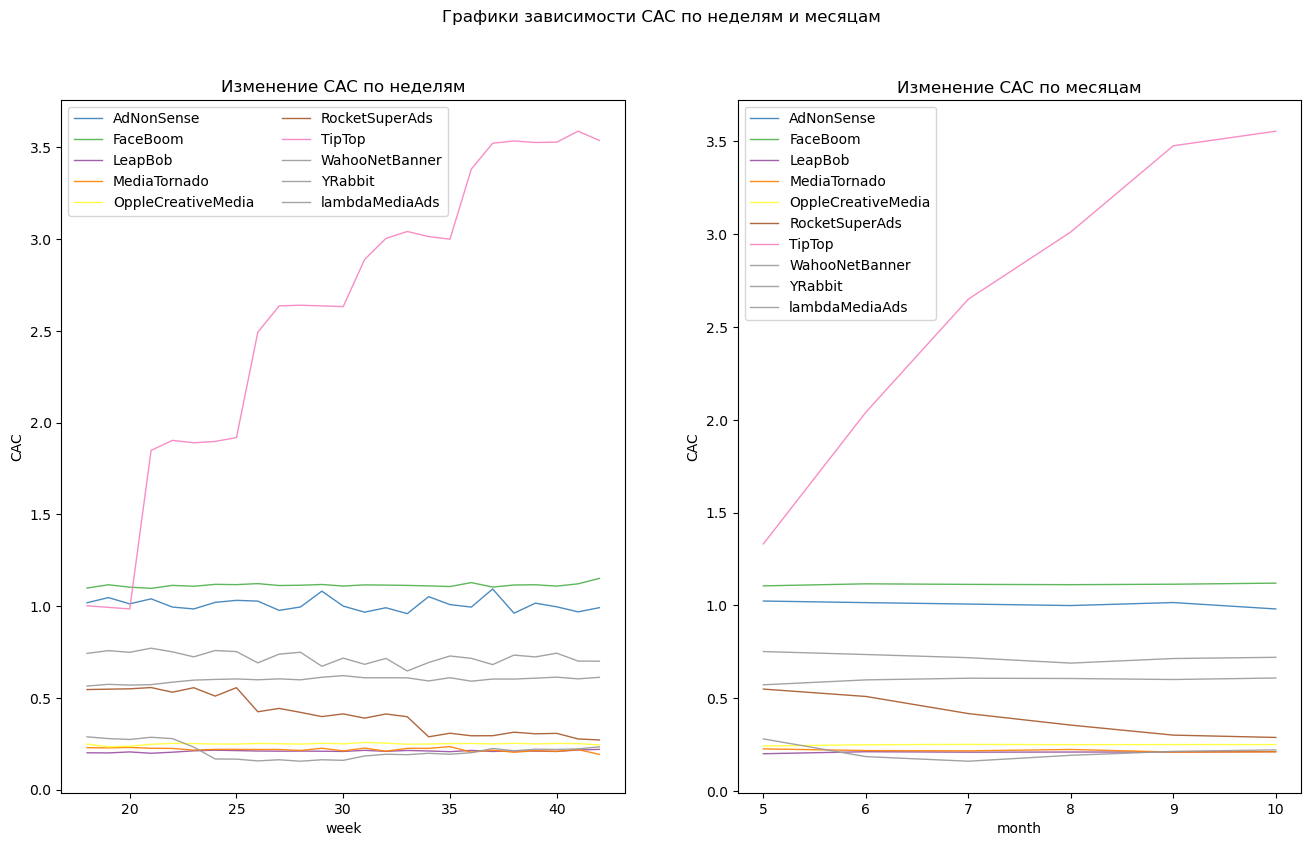

In [56]:
plt.figure(figsize=(16, 9)).suptitle('Графики зависимости CAC по неделям и месяцам')
#figure.suptitle('Графики зависимости CAC по неделям и месяцам')
# График изменения CAC по неделям
plt.subplot(1, 2, 1)
num = 0
palette = plt.get_cmap('Set1')
for column in cac_grouped_week.columns:
    if column != 'dt' and column != 'week' and column != 'month':
        num+=1
        plt.plot(
            cac_grouped_week['week'], 
            cac_grouped_week[column], 
            marker='', 
            color=palette(num), 
            linewidth=1, 
            alpha=0.9, 
            label=column)
plt.title('Изменение CAC по неделям')
plt.xlabel("week")
plt.ylabel("CAC")
plt.legend(loc=2, ncol=2)
# График изменения CAC по месяцам
plt.subplot(1, 2, 2)
num = 0
palette = plt.get_cmap('Set1')
for column in cac_grouped_month.columns:
    if column != 'dt' and column != 'week' and column != 'month':
        num+=1
        plt.plot(
            cac_grouped_month['month'], 
            cac_grouped_month[column], 
            marker='', 
            color=palette(num), 
            linewidth=1, 
            alpha=0.9, 
            label=column)
plt.title('Изменение CAC по месяцам')
plt.xlabel("month")
plt.ylabel("CAC")
plt.legend();

По графикам можно сделать вывод, что стоимость привленчения пользователя остается примерно постоянной во времени для всех каналов за исключением канала TipTop, который демонстрирует рост стоимости с 1 до 3,5.

**Промежуточные выводы по разделу маркетинг**  
- Общая сума расходов на маркетинг: 105497.30
- Распределение трат по рекламным источникам: лидеры - TipTop (51,9%) и FaceBoom (30,8%), остальные каналы привленчения менее 5% каждый.
- В среднем привлечение одного пользователя (CAC) из каждого источника стоило от 2,73 для TipTop до 0,22 для YRabbit. 
- Стоимость привленчения пользователя остается примерно постоянной во времени для всех каналов за исключением канала `TipTop`, который демонстрирует рост стоимости с 1 до 3,5.  
Необходимо дополнительно исследовать окупаемость рекламы по каналу `TipTop`.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Описать возможные причины обнаруженных проблем и дать промежуточные рекомендации для рекламного отдела.

Для исследования используем последнюю доступную дату 2019-10-27 и горизонт анализа 14 дней, так как в бизнес-плане заложено, что пользователи должны окупиться не позднее, чем через 2 недели после привлечения. Поскольку анализируем окупаемость рекламы, органических пользователей не включаем.  

In [57]:
print(observation_date, analysis_horizon)

2019-10-27 00:00:00 14


In [58]:
profiles_ads = profiles.loc[profiles['channel'] != 'organic']
profiles_ads.head(5)

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

          dt               month  payer  acquisition_cost  
0 2019-05-07 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 2019-07-09 12:46:07  False          1.107237  
3 2019-08-22 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 2019-10-02 00:07:44  False          0.230769  
7 2019-06-30 2019-06-30 03:46:29   True          1.008000

In [59]:
# подсчет LTV
ltv, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles_ads, orders, observation_date, analysis_horizon) 
roi_in_time.tail(5)

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-10-10          511  1.391781  0.359294  0.436474  0.492604  0.515059   
2019-10-11          615  1.331081  0.160930  0.215791  0.252365  0.276748   
2019-10-12          607  1.282389  0.283398  0.334682  0.443712  0.450123   
2019-10-13          536  1.307491  0.256344  0.320441  0.363163  0.405885   
2019-10-14          480  1.228146  0.287798  0.382606  0.441858  0.475717   

                 4.0       5.0       6.0       7.0       8.0       9.0  \
dt                                                                       
2019-10-10  0.578206  0.620318  0.655399  0.697497  0.725562  0.767660   
2019-10-11  0.301131  0.307226  0.356028  0.374315  0.410889  0.435284   
2019-10-12  0.469354  0.475765  0.488586  0.514228  0.527049  0.552691   
2019-10-13  0.450033  0.478514  0.521236  0.535477  0.563958  0.578198   
2019-10-14  0.501111  0.509576  0.526505  0.543434  0.560364  0.577293   

                10.0      11.0      12.0      13.0  
dt                                                  
2019-10-10  0.788709  0.823791  0.851856  0.858872  
2019-10-11  0.435284  0.459667  0.471858  0.490145  
2019-10-12  0.565512  0.571922  0.578333  0.591154  
2019-10-13  0.606679  0.628040  0.663642  0.670762  
2019-10-14  0.585758  0.602687  0.636546  0.661940

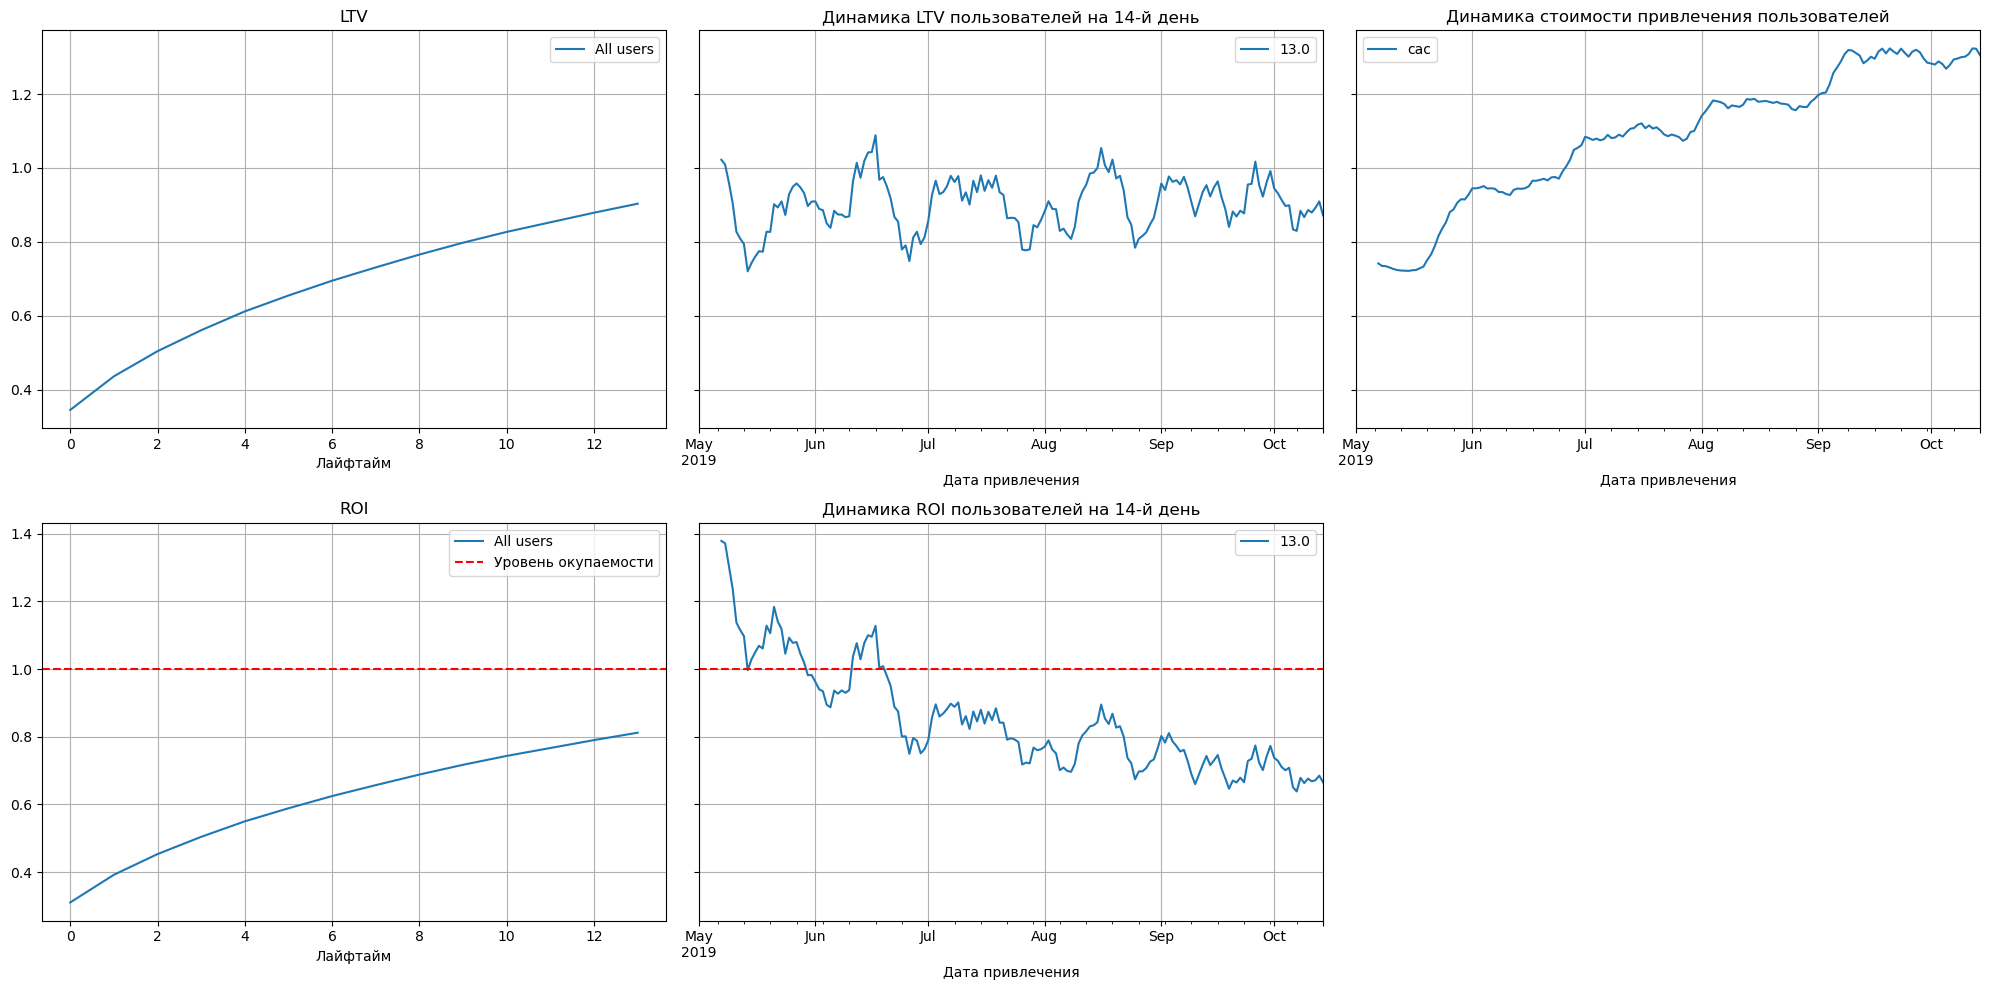

In [60]:
# окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, analysis_horizon)

LTV растет по лайфтайму клиента, ROI - аналогично, но окупаемость не достигается к 14 дню, указанному как цель по окупаемости в бизнес-плане. Тренд динамики LTV горизонтальный, ROI снижается с мая по октябрь вмести с ростом CAC в этот период. Плохая окупаемость можнет быть связано с общим ростом CAC из-за роста стоимости привлечения клиентов в канале `TipTop`.

In [61]:
# Расчет конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_ads, orders, observation_date, analysis_horizon)
conversion_history.tail(5)

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-10-10          511  0.082192  0.088063  0.091977  0.093933  0.097847   
2019-10-11          615  0.039024  0.045528  0.050407  0.050407  0.053659   
2019-10-12          607  0.057661  0.062603  0.072488  0.072488  0.072488   
2019-10-13          536  0.059701  0.063433  0.065299  0.069030  0.070896   
2019-10-14          480  0.064583  0.072917  0.079167  0.079167  0.079167   

                 5.0       6.0       7.0       8.0       9.0      10.0  \
dt                                                                       
2019-10-10  0.101761  0.101761  0.103718  0.103718  0.105675  0.105675   
2019-10-11  0.053659  0.055285  0.055285  0.055285  0.055285  0.055285   
2019-10-12  0.072488  0.074135  0.074135  0.075783  0.075783  0.075783   
2019-10-13  0.070896  0.072761  0.072761  0.072761  0.072761  0.074627   
2019-10-14  0.079167  0.079167  0.081250  0.081250  0.081250  0.081250   

                11.0      12.0      13.0  
dt                                        
2019-10-10  0.105675  0.105675  0.105675  
2019-10-11  0.055285  0.055285  0.055285  
2019-10-12  0.075783  0.075783  0.075783  
2019-10-13  0.074627  0.074627  0.076493  
2019-10-14  0.081250  0.083333  0.083333

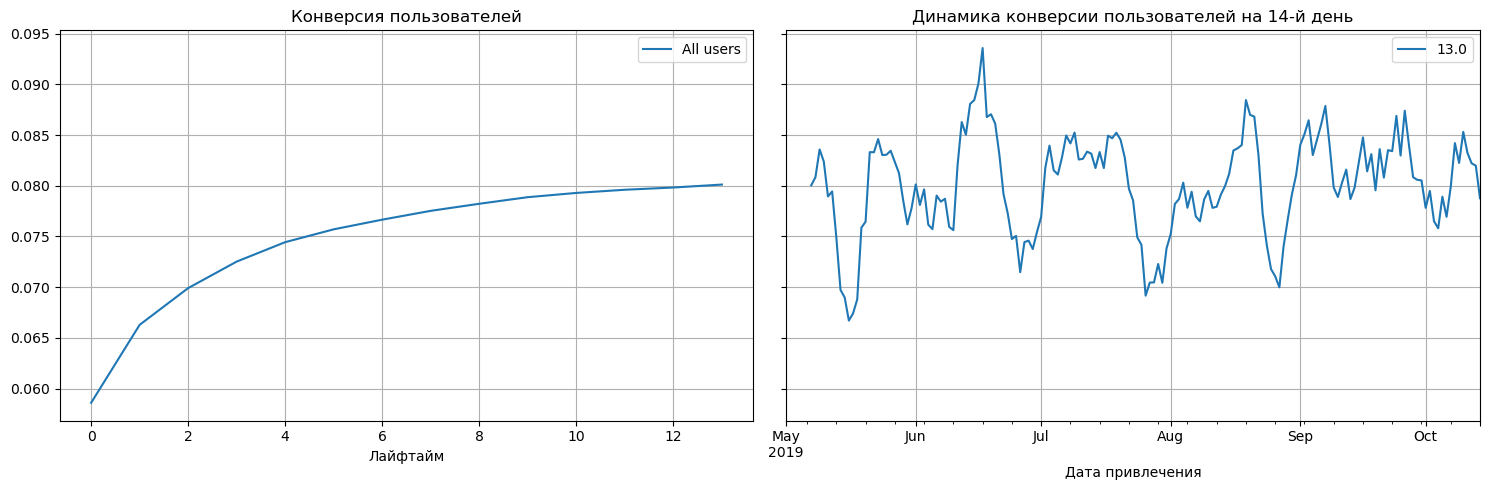

In [62]:
# Графики конверсии
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия пользователей растет по лайфтайму, есть положительная динамика с мая по октябрь.

In [63]:
# Конверсия по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['region'])
conversion_history.tail(5)

cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
United States 2019-10-10          363  0.101928  0.107438  0.110193  0.112948   
              2019-10-11          430  0.053488  0.060465  0.067442  0.067442   
              2019-10-12          411  0.077859  0.080292  0.090024  0.090024   
              2019-10-13          345  0.066667  0.072464  0.075362  0.081159   
              2019-10-14          318  0.084906  0.094340  0.100629  0.100629   

                               4.0       5.0       6.0       7.0       8.0  \
region        dt                                                             
United States 2019-10-10  0.112948  0.115702  0.115702  0.118457  0.118457   
              2019-10-11  0.072093  0.072093  0.074419  0.074419  0.074419   
              2019-10-12  0.090024  0.090024  0.092457  0.092457  0.092457   
              2019-10-13  0.084058  0.084058  0.086957  0.086957  0.086957   
              2019-10-14  0.100629  0.100629  0.100629  0.103774  0.103774   

                               9.0      10.0      11.0      12.0      13.0  
region        dt                                                            
United States 2019-10-10  0.121212  0.121212  0.121212  0.121212  0.121212  
              2019-10-11  0.074419  0.074419  0.074419  0.074419  0.074419  
              2019-10-12  0.092457  0.092457  0.092457  0.092457  0.092457  
              2019-10-13  0.086957  0.086957  0.086957  0.086957  0.089855  
              2019-10-14  0.103774  0.103774  0.103774  0.103774  0.103774

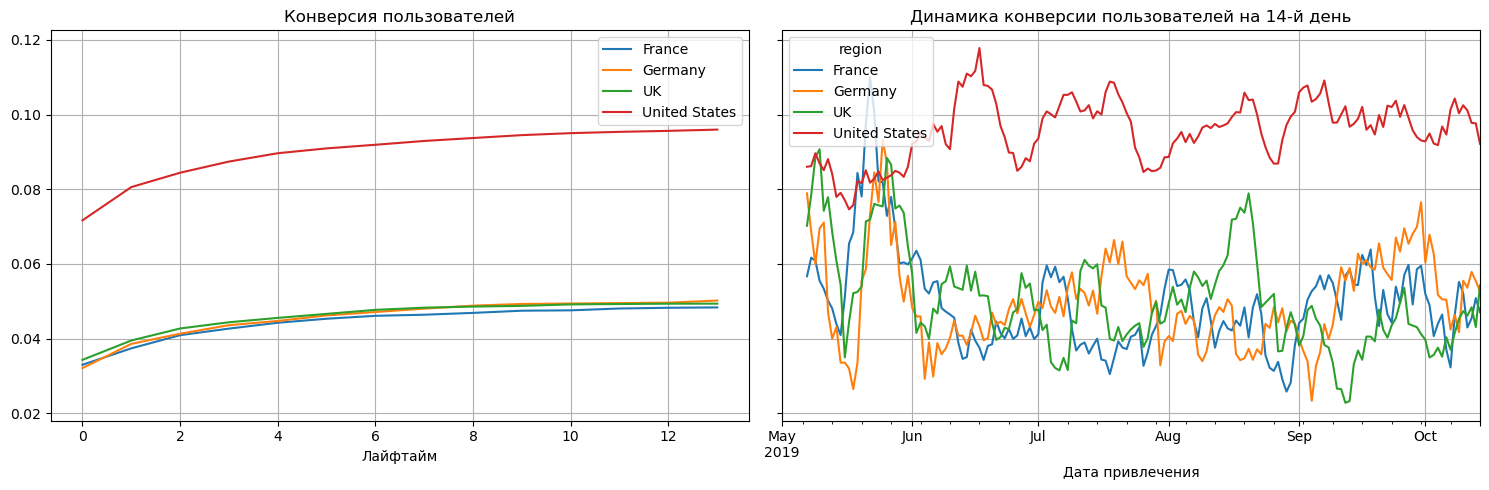

In [64]:
# Графики конверсии по странам
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Пользователи из США имеют самый высокий показатель конверсии.

In [65]:
# Конверсия по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['channel'])
conversion_history.tail(5)

cohort_size       0.0       1.0       2.0  \
channel        dt                                                      
lambdaMediaAds 2019-10-10            5  0.200000  0.200000  0.200000   
               2019-10-11            7  0.000000  0.000000  0.000000   
               2019-10-12           12  0.083333  0.083333  0.083333   
               2019-10-13           17  0.117647  0.117647  0.117647   
               2019-10-14            8  0.125000  0.125000  0.125000   

                                3.0       4.0       5.0       6.0       7.0  \
channel        dt                                                             
lambdaMediaAds 2019-10-10  0.200000  0.200000  0.400000  0.400000  0.400000   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  0.083333  0.083333  0.083333  0.083333  0.083333   
               2019-10-13  0.117647  0.117647  0.117647  0.117647  0.117647   
               2019-10-14  0.125000  0.125000  0.125000  0.125000  0.125000   

                                8.0       9.0      10.0      11.0      12.0  \
channel        dt                                                             
lambdaMediaAds 2019-10-10  0.400000  0.400000  0.400000  0.400000  0.400000   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  0.166667  0.166667  0.166667  0.166667  0.166667   
               2019-10-13  0.117647  0.117647  0.117647  0.117647  0.117647   
               2019-10-14  0.125000  0.125000  0.125000  0.125000  0.125000   

                               13.0  
channel        dt                    
lambdaMediaAds 2019-10-10  0.400000  
               2019-10-11  0.000000  
               2019-10-12  0.166667  
               2019-10-13  0.117647  
               2019-10-14  0.125000

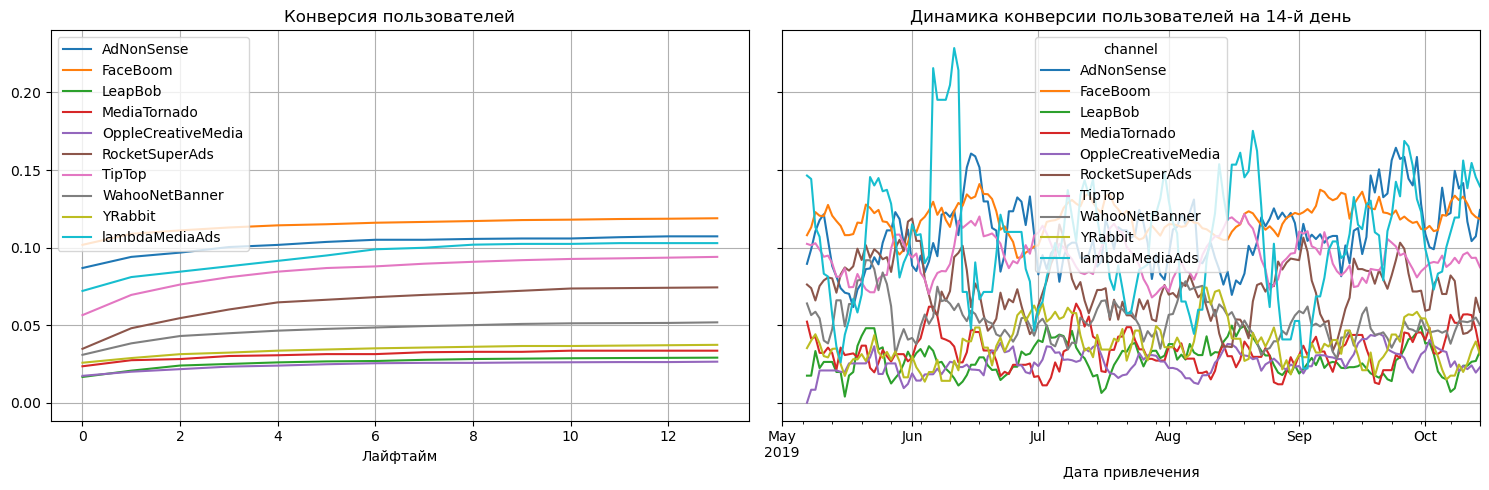

In [66]:
# Графики конверсии по каналам привлечения
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Лидеры по конверсии: FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds. 

In [67]:
# Конверсия по каналам устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['device'])
conversion_history.tail(5)

cohort_size       0.0       1.0       2.0       3.0  \
device dt                                                                
iPhone 2019-10-10          196  0.096939  0.107143  0.107143  0.107143   
       2019-10-11          223  0.040359  0.044843  0.049327  0.049327   
       2019-10-12          237  0.092827  0.097046  0.113924  0.113924   
       2019-10-13          186  0.032258  0.032258  0.037634  0.048387   
       2019-10-14          187  0.069519  0.074866  0.080214  0.080214   

                        4.0       5.0       6.0       7.0       8.0       9.0  \
device dt                                                                       
iPhone 2019-10-10  0.107143  0.107143  0.107143  0.107143  0.107143  0.107143   
       2019-10-11  0.053812  0.053812  0.053812  0.053812  0.053812  0.053812   
       2019-10-12  0.113924  0.113924  0.118143  0.118143  0.122363  0.122363   
       2019-10-13  0.053763  0.053763  0.059140  0.059140  0.059140  0.059140   
       2019-10-14  0.080214  0.080214  0.080214  0.080214  0.080214  0.080214   

                       10.0      11.0      12.0      13.0  
device dt                                                  
iPhone 2019-10-10  0.107143  0.107143  0.107143  0.107143  
       2019-10-11  0.053812  0.053812  0.053812  0.053812  
       2019-10-12  0.122363  0.122363  0.122363  0.122363  
       2019-10-13  0.064516  0.064516  0.064516  0.064516  
       2019-10-14  0.080214  0.080214  0.080214  0.080214

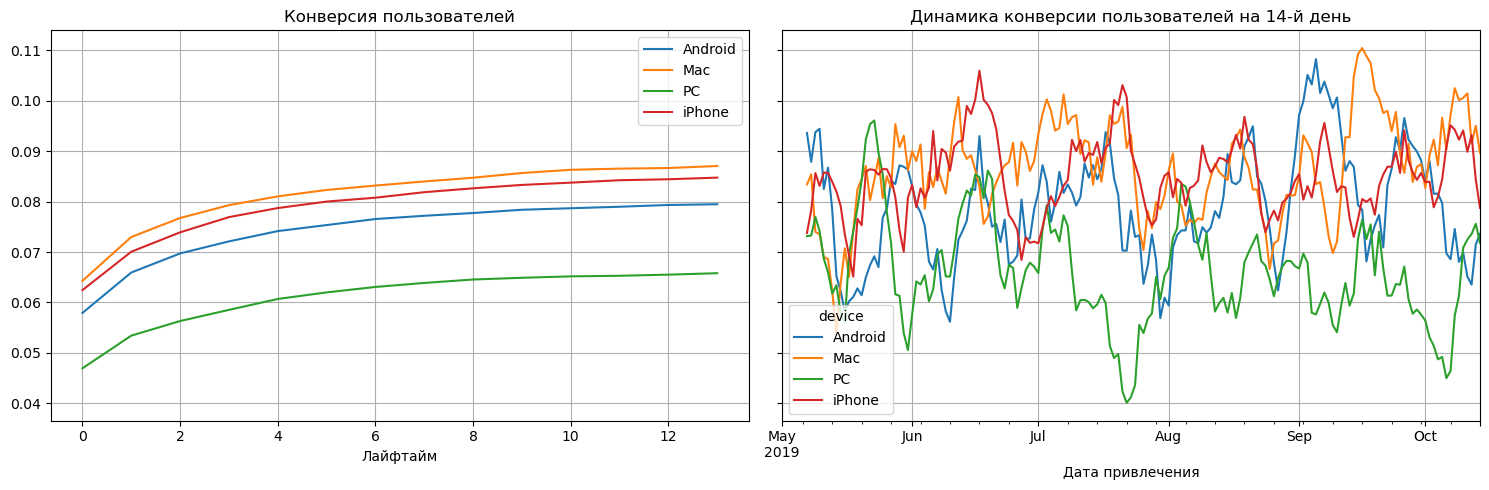

In [68]:
# Графики конверсии по устройствам
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Лидеры по конверсии: Mac, iPhone, ниже - Anrroid и самый последний - PC.

In [69]:
# Расчет удержания
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles_ads, visits, observation_date, analysis_horizon)
retention_in_time.tail(5)

cohort_size    0         1         2         3         4  \
payer dt                                                                     
True  2019-10-10           54  1.0  0.388889  0.333333  0.185185  0.277778   
      2019-10-11           34  1.0  0.529412  0.205882  0.264706  0.264706   
      2019-10-12           48  1.0  0.291667  0.333333  0.208333  0.145833   
      2019-10-13           41  1.0  0.292683  0.219512  0.268293  0.292683   
      2019-10-14           41  1.0  0.292683  0.292683  0.243902  0.170732   

                         5         6         7         8         9        10  \
payer dt                                                                       
True  2019-10-10  0.148148  0.148148  0.203704  0.111111  0.259259  0.148148   
      2019-10-11  0.088235  0.147059  0.117647  0.205882  0.176471  0.088235   
      2019-10-12  0.166667  0.104167  0.208333  0.083333  0.125000  0.083333   
      2019-10-13  0.243902  0.268293  0.073171  0.170732  0.146341  0.170732   
      2019-10-14  0.097561  0.121951  0.121951  0.121951  0.073171  0.073171   

                        11        12        13  
payer dt                                        
True  2019-10-10  0.240741  0.129630  0.092593  
      2019-10-11  0.117647  0.117647  0.147059  
      2019-10-12  0.020833  0.041667  0.083333  
      2019-10-13  0.121951  0.219512  0.073171  
      2019-10-14  0.048780  0.121951  0.121951

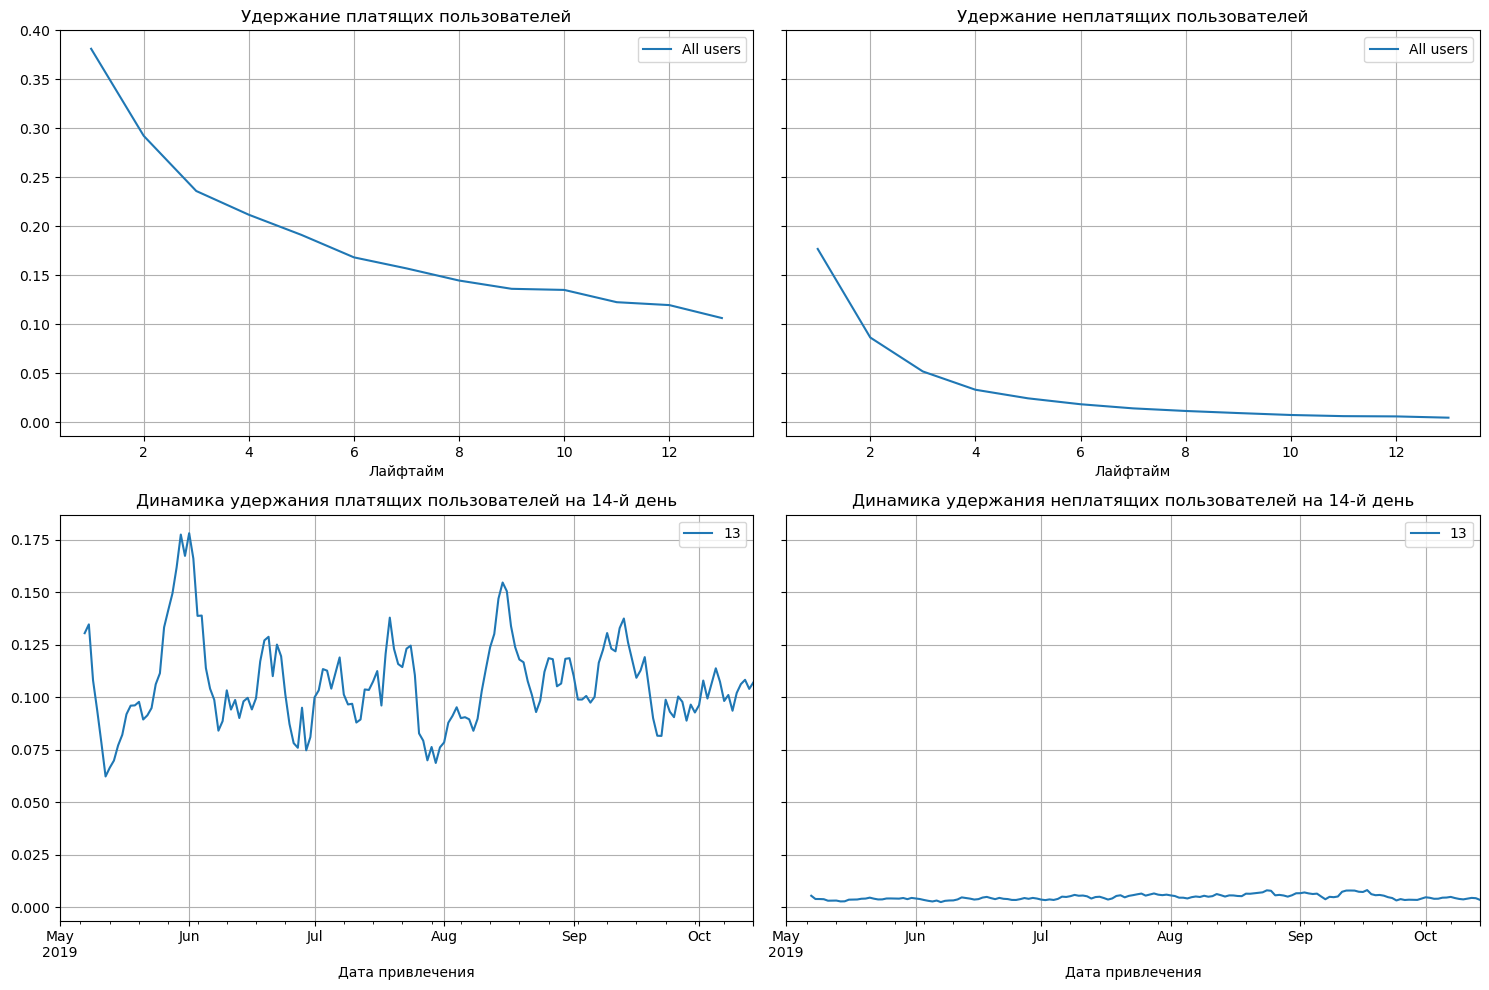

In [70]:
# Графики удержания
plot_retention(retention_grouped, retention_in_time, analysis_horizon)

Удержание пользователей снижается по лайфтайму, удержание платящих выше удержания не платящих. Динамика удержания постоянная.

In [71]:
# Расчет удержания по странам
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles_ads, visits, observation_date, analysis_horizon, dimensions = ['region'])
retention_in_time.tail(5)

cohort_size    0         1         2  \
payer region        dt                                                 
True  United States 2019-10-10           44  1.0  0.409091  0.318182   
                    2019-10-11           32  1.0  0.500000  0.218750   
                    2019-10-12           38  1.0  0.263158  0.315789   
                    2019-10-13           31  1.0  0.225806  0.193548   
                    2019-10-14           33  1.0  0.303030  0.242424   

                                       3         4         5         6  \
payer region        dt                                                   
True  United States 2019-10-10  0.227273  0.227273  0.113636  0.113636   
                    2019-10-11  0.218750  0.281250  0.093750  0.156250   
                    2019-10-12  0.157895  0.157895  0.157895  0.105263   
                    2019-10-13  0.258065  0.258065  0.193548  0.258065   
                    2019-10-14  0.272727  0.181818  0.060606  0.090909   

                                       7         8         9        10  \
payer region        dt                                                   
True  United States 2019-10-10  0.181818  0.113636  0.250000  0.159091   
                    2019-10-11  0.093750  0.218750  0.156250  0.031250   
                    2019-10-12  0.184211  0.078947  0.078947  0.105263   
                    2019-10-13  0.064516  0.064516  0.193548  0.161290   
                    2019-10-14  0.151515  0.090909  0.060606  0.060606   

                                      11        12        13  
payer region        dt                                        
True  United States 2019-10-10  0.272727  0.136364  0.090909  
                    2019-10-11  0.093750  0.125000  0.156250  
                    2019-10-12  0.026316  0.052632  0.105263  
                    2019-10-13  0.064516  0.193548  0.032258  
                    2019-10-14  0.030303  0.121212  0.030303

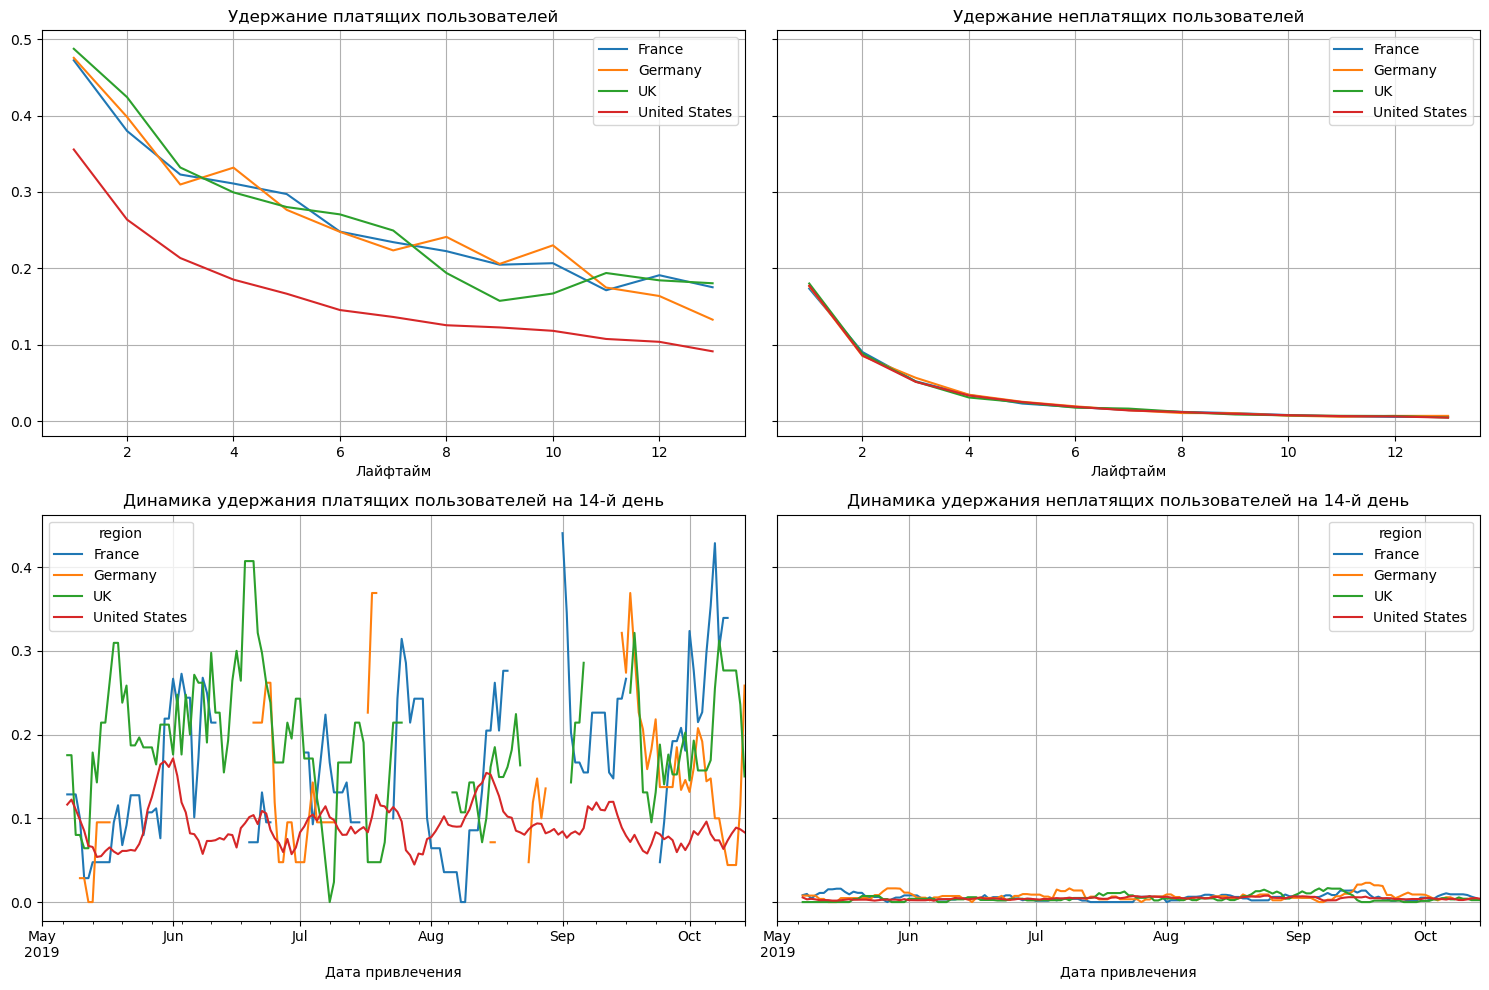

In [72]:
# Графики удержания по странам
plot_retention(retention_grouped, retention_in_time, analysis_horizon)

Удержание хуже всего для платящих пользователей из США, динамика постоянная.

In [73]:
# Расчет удержания по каналам
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles_ads, visits, observation_date, analysis_horizon, dimensions = ['channel'])
retention_in_time.tail(5)

cohort_size    0    1         2    3  \
payer channel        dt                                                 
True  lambdaMediaAds 2019-10-08            3  1.0  0.0  0.666667  0.0   
                     2019-10-10            2  1.0  0.5  0.500000  0.0   
                     2019-10-12            2  1.0  0.5  0.500000  1.0   
                     2019-10-13            2  1.0  1.0  0.500000  0.0   
                     2019-10-14            1  1.0  0.0  1.000000  0.0   

                                        4         5         6    7    8    9  \
payer channel        dt                                                        
True  lambdaMediaAds 2019-10-08  0.333333  0.333333  0.333333  1.0  0.0  0.0   
                     2019-10-10  0.000000  0.500000  1.000000  0.0  0.5  0.0   
                     2019-10-12  0.000000  0.500000  0.000000  0.5  0.5  0.5   
                     2019-10-13  1.000000  0.500000  0.500000  0.0  0.5  0.0   
                     2019-10-14  0.000000  0.000000  1.000000  0.0  0.0  1.0   

                                  10   11        12        13  
payer channel        dt                                        
True  lambdaMediaAds 2019-10-08  0.0  0.0  0.333333  0.333333  
                     2019-10-10  0.5  0.5  0.000000  0.000000  
                     2019-10-12  0.0  0.0  0.000000  0.000000  
                     2019-10-13  0.0  0.0  0.500000  0.000000  
                     2019-10-14  0.0  1.0  0.000000  1.000000

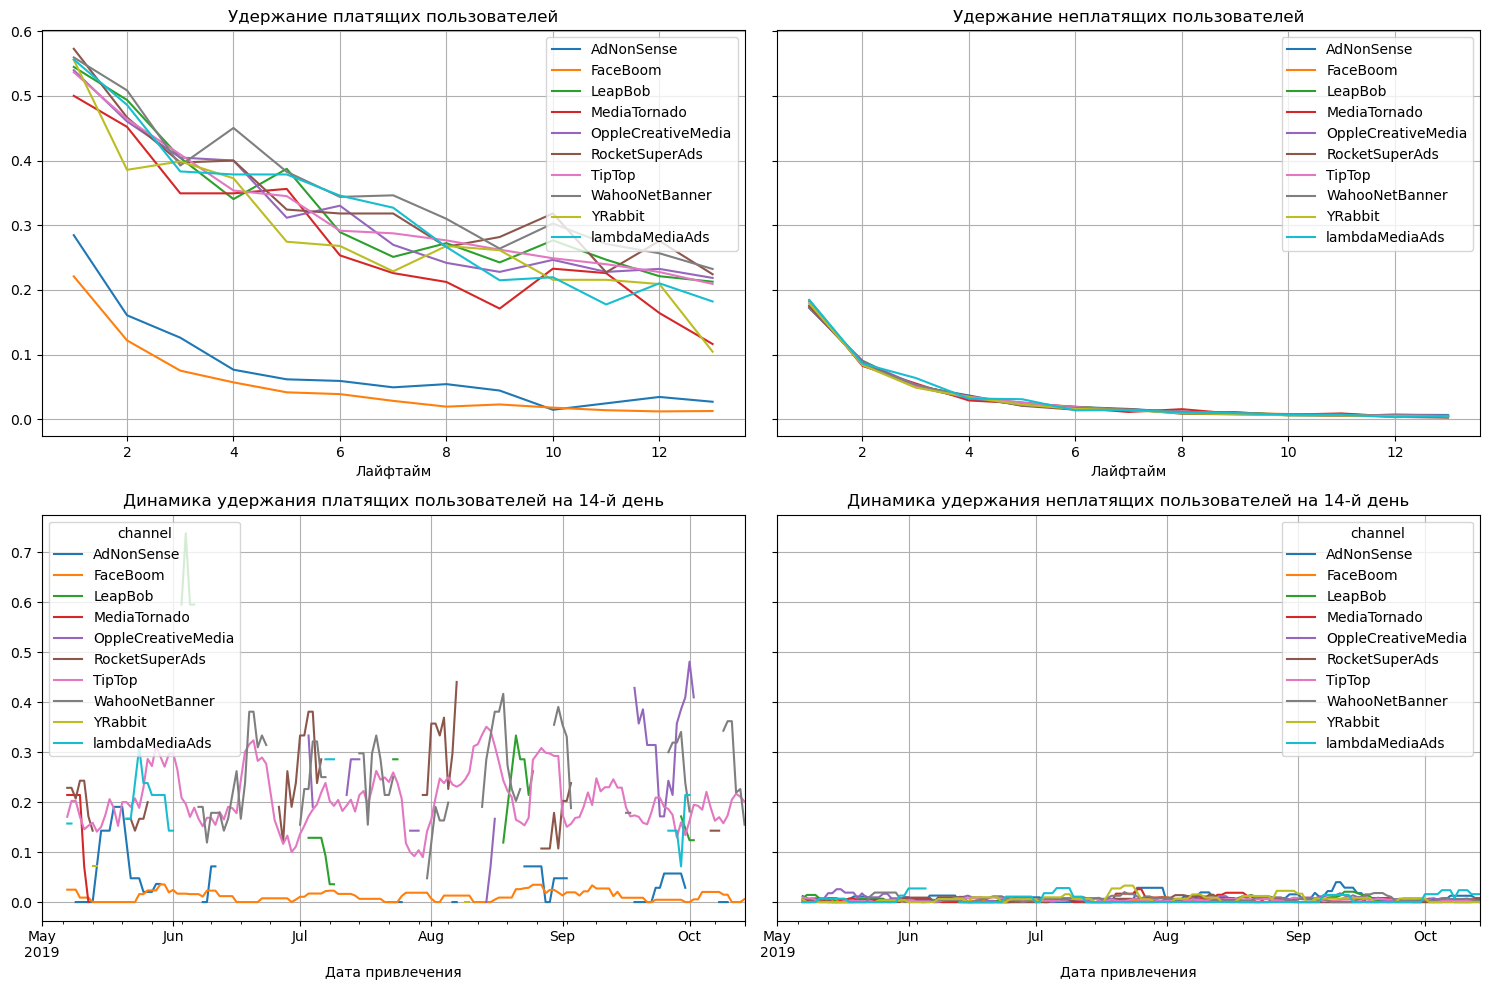

In [74]:
# Графики удержания по каналам
plot_retention(retention_grouped, retention_in_time, analysis_horizon)

Удержание хуже у каналов AdNoneSense и FaceBoom

In [75]:
# Расчет удержания по устройствам
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles_ads, visits, observation_date, analysis_horizon, dimensions = ['device'])
retention_in_time.tail(5)

cohort_size    0         1         2         3  \
payer device dt                                                           
True  iPhone 2019-10-10           21  1.0  0.523810  0.380952  0.190476   
             2019-10-11           12  1.0  0.583333  0.166667  0.250000   
             2019-10-12           30  1.0  0.266667  0.433333  0.266667   
             2019-10-13           12  1.0  0.083333  0.333333  0.416667   
             2019-10-14           15  1.0  0.333333  0.200000  0.266667   

                                4         5         6         7         8  \
payer device dt                                                             
True  iPhone 2019-10-10  0.380952  0.142857  0.000000  0.190476  0.142857   
             2019-10-11  0.333333  0.000000  0.166667  0.083333  0.166667   
             2019-10-12  0.166667  0.233333  0.133333  0.233333  0.100000   
             2019-10-13  0.250000  0.333333  0.166667  0.000000  0.250000   
             2019-10-14  0.266667  0.066667  0.200000  0.133333  0.200000   

                                9        10        11        12        13  
payer device dt                                                            
True  iPhone 2019-10-10  0.190476  0.190476  0.285714  0.190476  0.095238  
             2019-10-11  0.166667  0.083333  0.083333  0.083333  0.083333  
             2019-10-12  0.166667  0.100000  0.000000  0.066667  0.100000  
             2019-10-13  0.250000  0.250000  0.083333  0.333333  0.000000  
             2019-10-14  0.000000  0.000000  0.066667  0.066667  0.133333

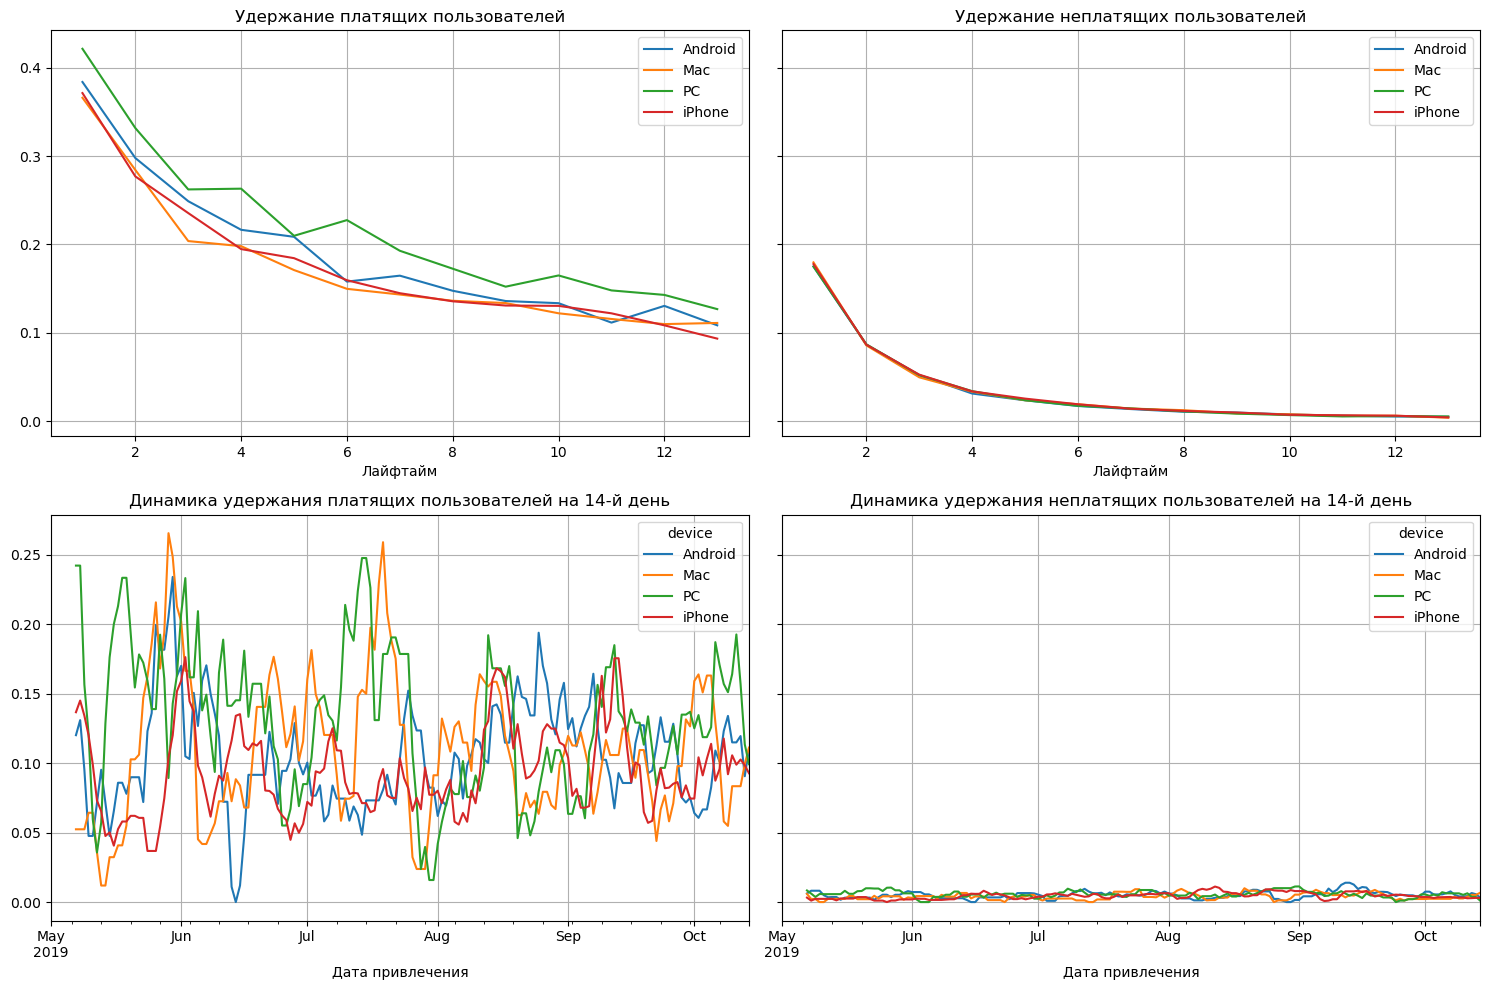

In [76]:
# Графики удержания по устройствам
plot_retention(retention_grouped, retention_in_time, analysis_horizon)

Удержание по устройствам примерно одинаково.

In [77]:
# Расчет LTV, CAC и ROI с разбивкой по каналам.
ltv, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['device']) 
roi_in_time.tail(5)

cohort_size       cac       0.0       1.0       2.0  \
device dt                                                                
iPhone 2019-10-10          196  1.565527  0.374132  0.455444  0.520494   
       2019-10-11          223  1.465294  0.152711  0.183253  0.198525   
       2019-10-12          237  1.565923  0.392726  0.433063  0.580992   
       2019-10-13          186  1.444028  0.111471  0.111471  0.167207   
       2019-10-14          187  1.312885  0.264226  0.365852  0.426827   

                        3.0       4.0       5.0       6.0       7.0       8.0  \
device dt                                                                       
iPhone 2019-10-10  0.553018  0.601806  0.618068  0.618068  0.666855  0.683117   
       2019-10-11  0.198525  0.229067  0.229067  0.259609  0.274880  0.305422   
       2019-10-12  0.594438  0.634775  0.648221  0.675112  0.715449  0.742340   
       2019-10-13  0.204364  0.222943  0.260100  0.278678  0.278678  0.315835   
       2019-10-14  0.467477  0.528452  0.528452  0.548777  0.569102  0.589427   

                        9.0      10.0      11.0      12.0      13.0  
device dt                                                            
iPhone 2019-10-10  0.699380  0.715642  0.731904  0.764429  0.780692  
       2019-10-11  0.305422  0.305422  0.320694  0.320694  0.320694  
       2019-10-12  0.782677  0.796123  0.796123  0.809568  0.836460  
       2019-10-13  0.315835  0.352993  0.371571  0.427307  0.427307  
       2019-10-14  0.589427  0.589427  0.609753  0.630078  0.650403

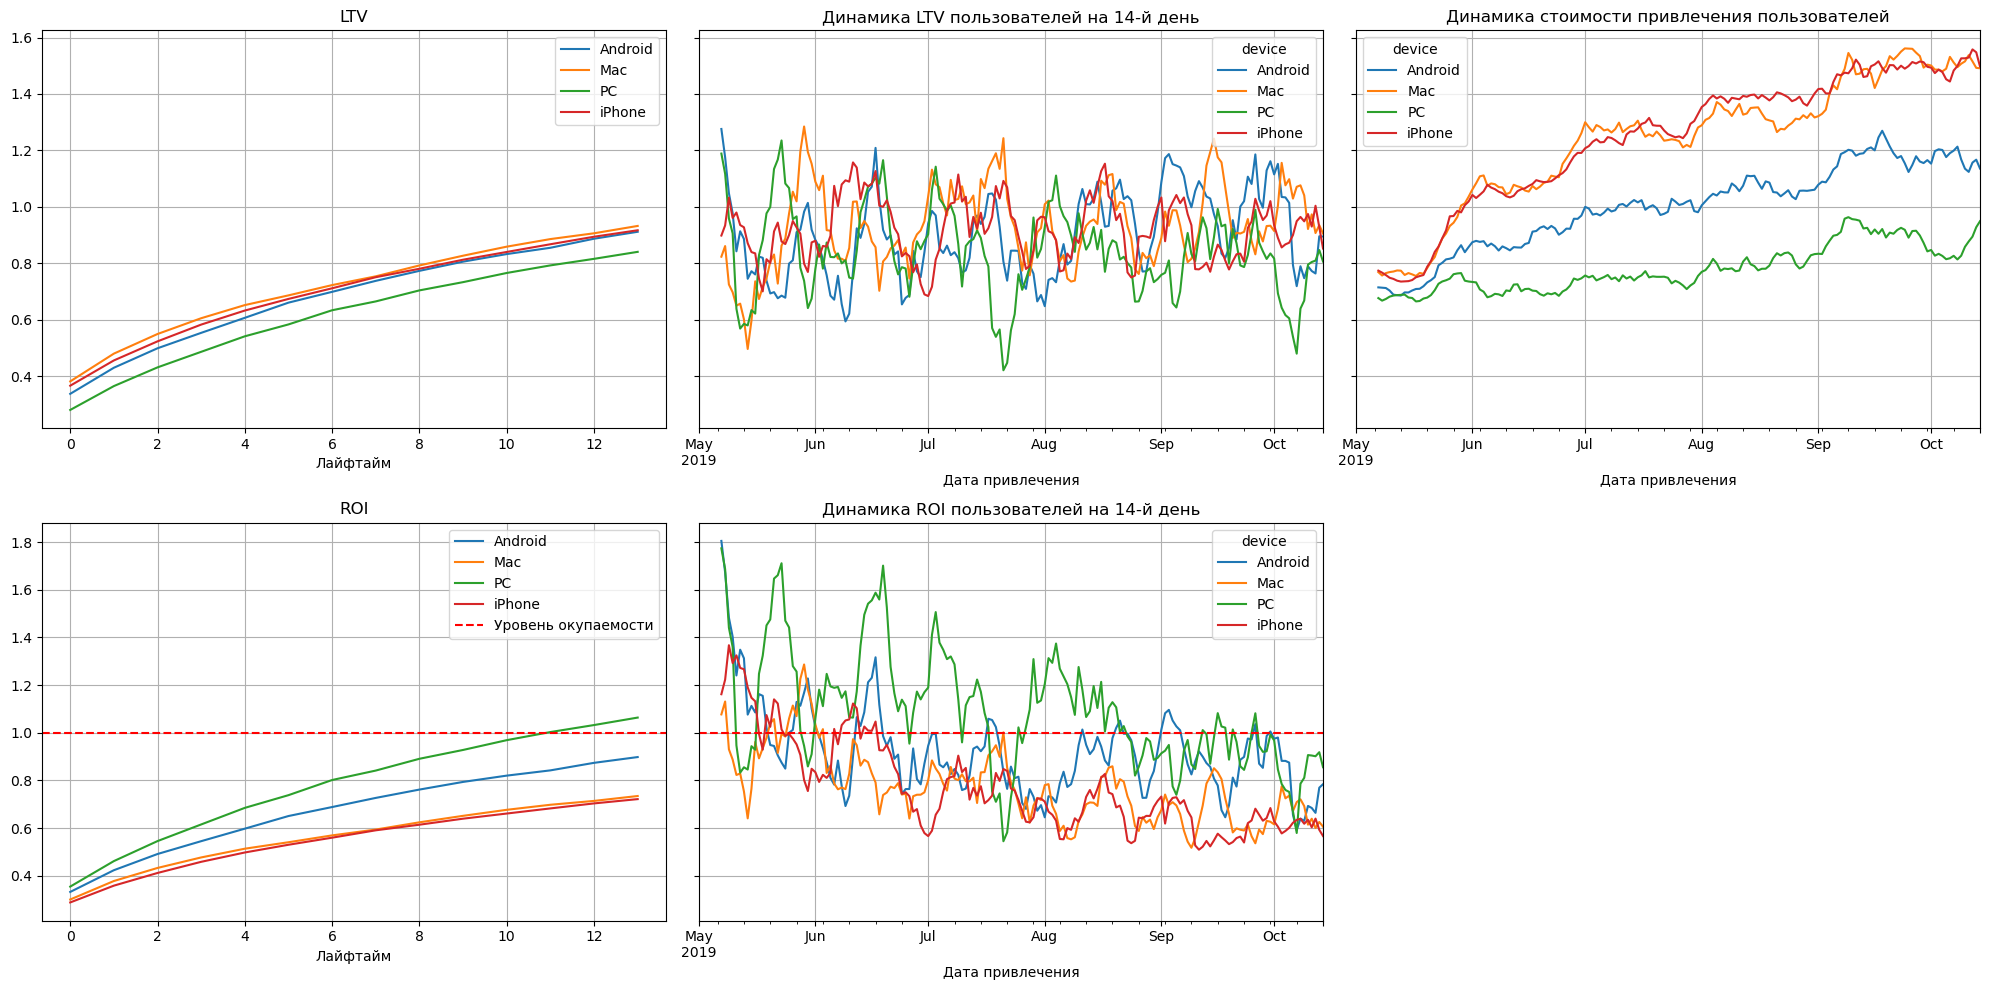

In [78]:
# графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разивкой по устройствам.
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, analysis_horizon)

Пользоватили с `Mac` и `iPhone` имеют несколько больший LTV, но и более высокую стоимость привлечения. В целом только пользователи PC окупаются за лайфтайм (14 дней) за счет меньшей стоимости привлечения, а пользователи `iPhone`, `Android` и `Mac` - нет. По динамике ROI заметно, что в начальный период май-июнь все пользователи окупались. Возможно, здесь сказывается повышение стоимости привлечения по каналу `TipTop`.

In [79]:
# Расчет LTV, CAC и ROI с разбивкой по странам.
ltv, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['region']) 
roi_in_time.tail(5)

cohort_size       cac       0.0       1.0       2.0  \
region        dt                                                                
United States 2019-10-10          363  1.772700  0.350557  0.428103  0.466876   
              2019-10-11          430  1.716616  0.171714  0.212275  0.252837   
              2019-10-12          411  1.688005  0.282010  0.317973  0.418727   
              2019-10-13          345  1.786652  0.202403  0.234785  0.267166   
              2019-10-14          318  1.621352  0.280669  0.379391  0.427782   

                               3.0       4.0       5.0       6.0       7.0  \
region        dt                                                             
United States 2019-10-10  0.491694  0.522712  0.538221  0.561485  0.600258   
              2019-10-11  0.273117  0.300158  0.306918  0.361040  0.374561   
              2019-10-12  0.418727  0.440304  0.447497  0.461882  0.483460   
              2019-10-13  0.299548  0.333552  0.357839  0.398316  0.406411   
              2019-10-14  0.456816  0.476173  0.476173  0.476173  0.495529   

                               8.0       9.0      10.0      11.0      12.0  \
region        dt                                                             
United States 2019-10-10  0.623522  0.654540  0.677804  0.716577  0.739841   
              2019-10-11  0.415122  0.428642  0.428642  0.448923  0.462443   
              2019-10-12  0.490653  0.505038  0.519423  0.526615  0.533808   
              2019-10-13  0.422602  0.438793  0.454984  0.471175  0.495462   
              2019-10-14  0.505208  0.514886  0.524564  0.534242  0.563277   

                              13.0  
region        dt                    
United States 2019-10-10  0.747595  
              2019-10-11  0.482724  
              2019-10-12  0.548193  
              2019-10-13  0.503557  
              2019-10-14  0.563277

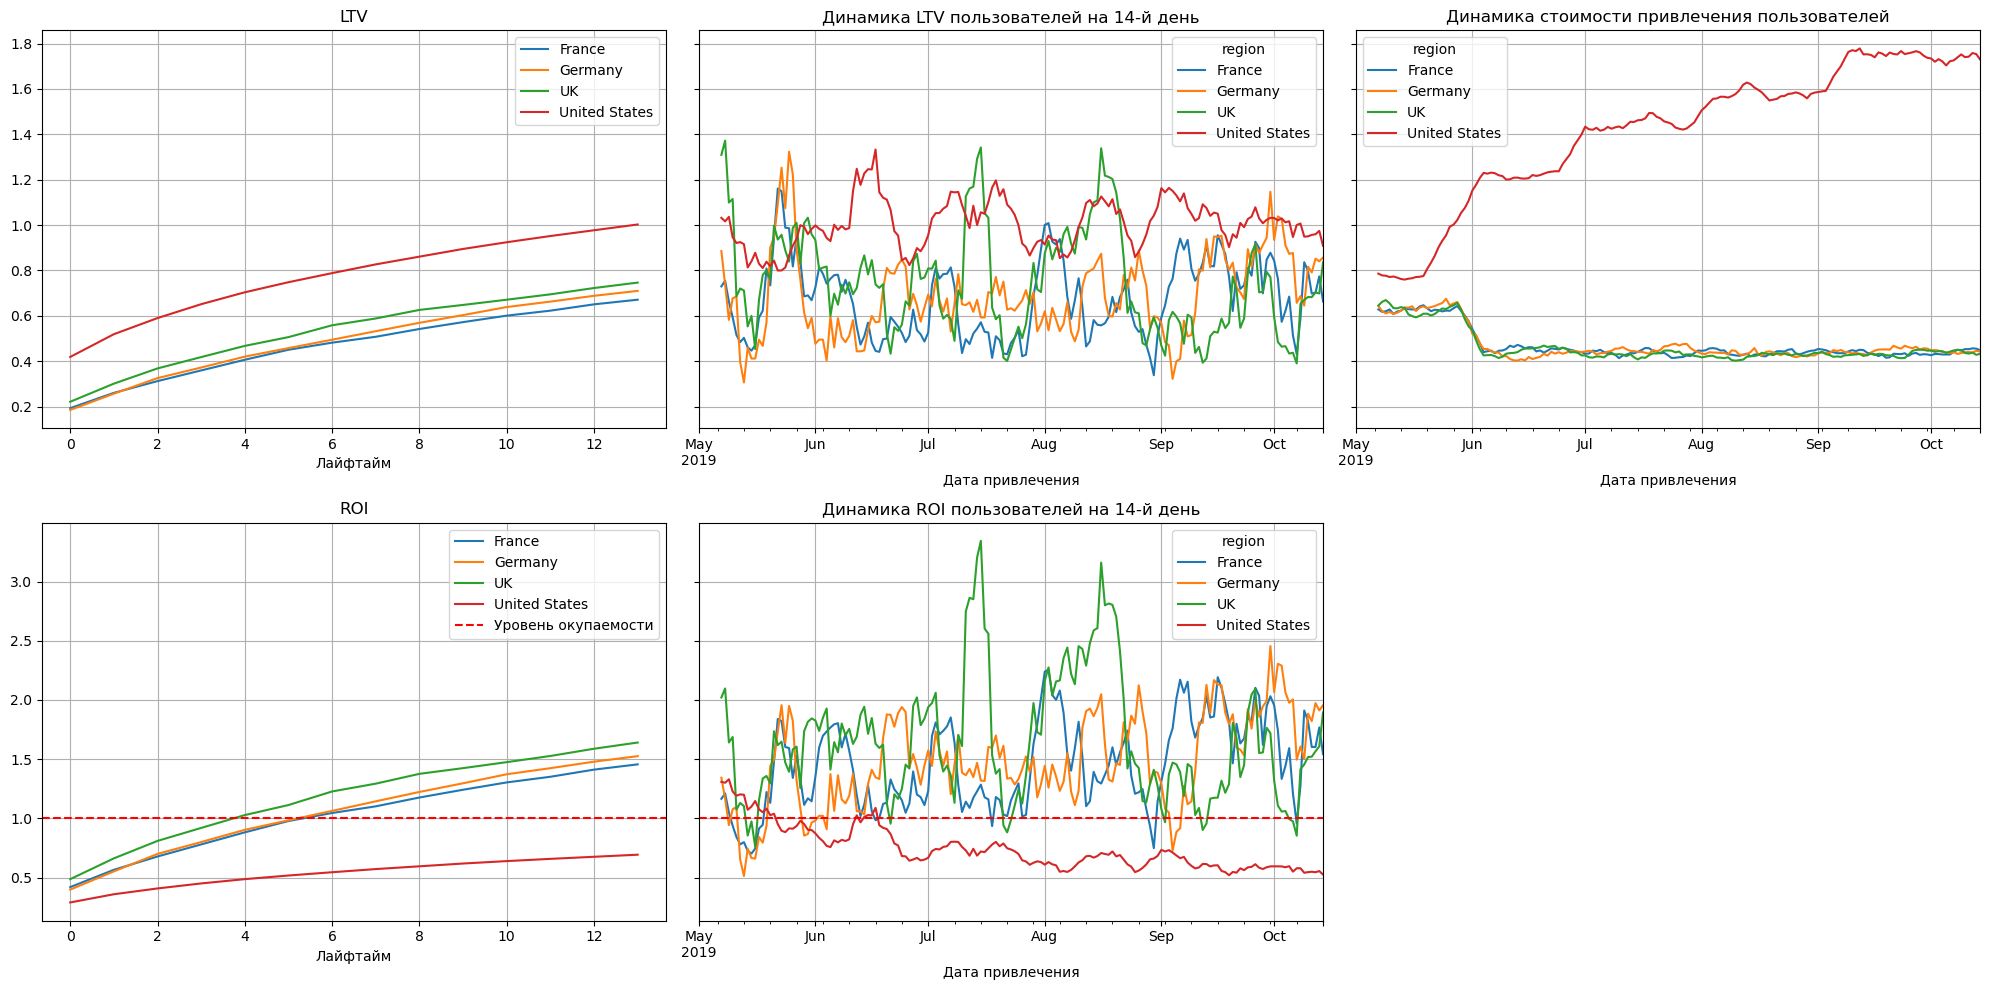

In [80]:
# графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разивкой по странам.
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, analysis_horizon)

Европейские пользователи имеют сходные показатели LTV, ROI, CAC и их динамики. Окупаются за лайфтайм. У пользователей из США выше LTV, но таже значительно выше и стоимость привлечения, поэтому они не окупаются за лайфтайм. Окупаемость была лучше в начальный период май-июнь. Динамика стоимости привлечения похожа на рост затрат по каналу `TipTop`.

In [81]:
# Расчет LTV, CAC и ROI с разбивкой по рекламным каналам.
ltv, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles_ads, orders, observation_date, analysis_horizon, dimensions = ['channel']) 
roi_in_time.tail(5)

cohort_size       cac       0.0       1.0  \
channel        dt                                                      
lambdaMediaAds 2019-10-10            5  0.800000  1.247500  1.247500   
               2019-10-11            7  0.571429  0.000000  0.000000   
               2019-10-12           12  0.733333  0.567045  0.567045   
               2019-10-13           17  0.800000  0.733824  1.467647   
               2019-10-14            8  0.700000  1.782143  1.782143   

                                2.0       3.0       4.0       5.0       6.0  \
channel        dt                                                             
lambdaMediaAds 2019-10-10  1.247500  1.247500  1.247500  2.495000  4.990000   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  1.134091  1.134091  1.134091  1.134091  1.134091   
               2019-10-13  1.467647  1.467647  1.834559  1.834559  1.834559   
               2019-10-14  2.673214  2.673214  2.673214  2.673214  3.564286   

                                7.0       8.0       9.0      10.0      11.0  \
channel        dt                                                             
lambdaMediaAds 2019-10-10  4.990000  6.237500  6.237500  6.237500  6.237500   
               2019-10-11  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-12  1.134091  1.701136  2.268182  2.268182  2.268182   
               2019-10-13  1.834559  2.201471  2.201471  2.201471  2.201471   
               2019-10-14  3.564286  3.564286  4.455357  4.455357  5.346429   

                               12.0      13.0  
channel        dt                              
lambdaMediaAds 2019-10-10  6.237500  6.237500  
               2019-10-11  0.000000  0.000000  
               2019-10-12  2.268182  2.268182  
               2019-10-13  2.568382  2.568382  
               2019-10-14  5.346429  6.237500

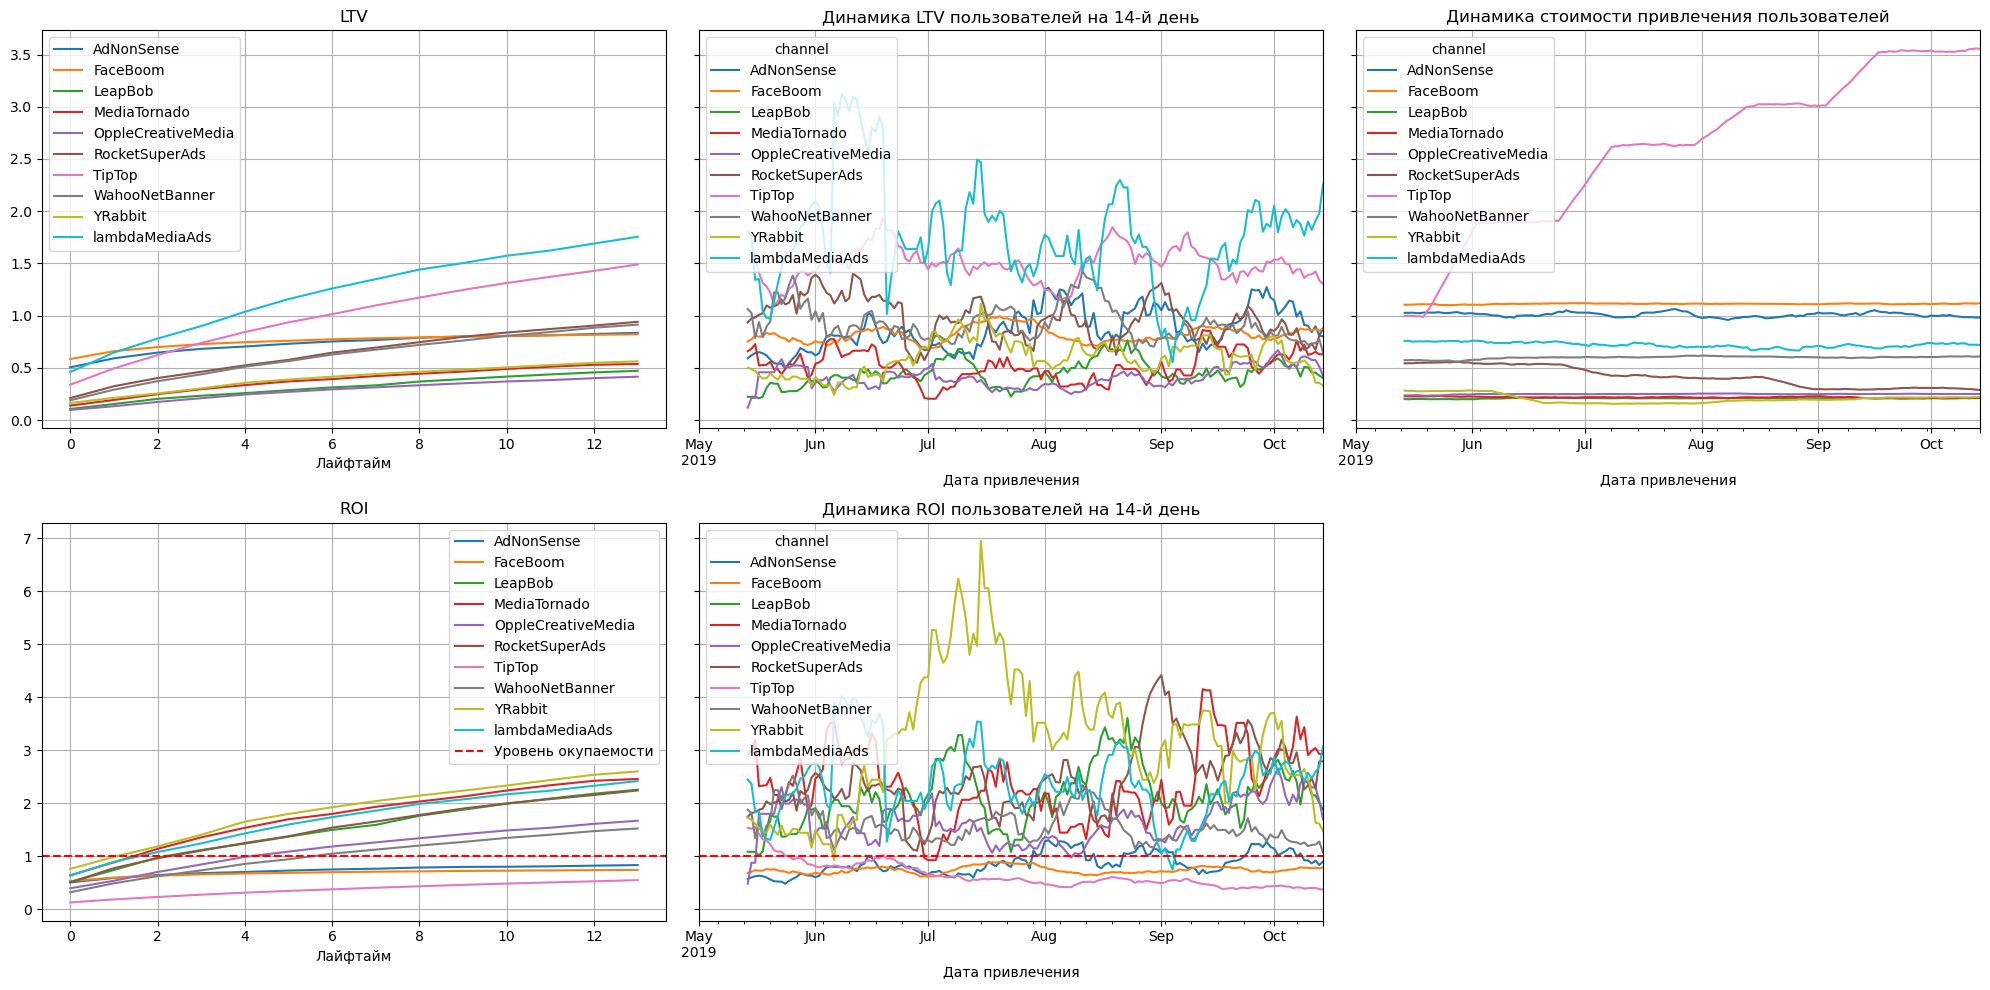

In [82]:
# графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разивкой по рекламным каналам.
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, analysis_horizon, window=14)

In [83]:
# Таблица с пользователями США
profiles_ads_usa = profiles_ads.loc[profiles_ads['region'] == 'United States']
profiles_ads_usa.head(5)

user_id            first_ts       channel  device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
4  31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
8  58263264 2019-05-11 19:18:43      FaceBoom  iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado  iPhone  United States   

          dt               month  payer  acquisition_cost  
0 2019-05-07 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 2019-07-09 12:46:07  False          1.107237  
4 2019-10-02 2019-10-02 00:07:44  False          0.230769  
8 2019-05-11 2019-05-11 19:18:43  False          1.128205  
9 2019-05-11 2019-05-11 21:13:47  False          0.250435

In [84]:
# Конверсия в США по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads_usa, orders, observation_date, analysis_horizon, dimensions = ['channel'])
conversion_history.tail(5)

cohort_size       0.0       1.0       2.0       3.0  \
channel dt                                                                
YRabbit 2019-10-10           26  0.000000  0.000000  0.000000  0.000000   
        2019-10-11           29  0.034483  0.034483  0.034483  0.034483   
        2019-10-12           34  0.029412  0.029412  0.058824  0.058824   
        2019-10-13           25  0.040000  0.040000  0.040000  0.040000   
        2019-10-14           22  0.000000  0.000000  0.000000  0.000000   

                         4.0       5.0       6.0       7.0       8.0  \
channel dt                                                             
YRabbit 2019-10-10  0.000000  0.000000  0.000000  0.000000  0.000000   
        2019-10-11  0.034483  0.034483  0.068966  0.068966  0.068966   
        2019-10-12  0.058824  0.058824  0.058824  0.058824  0.058824   
        2019-10-13  0.040000  0.040000  0.040000  0.040000  0.040000   
        2019-10-14  0.000000  0.000000  0.000000  0.000000  0.000000   

                         9.0      10.0      11.0      12.0      13.0  
channel dt                                                            
YRabbit 2019-10-10  0.000000  0.000000  0.000000  0.000000  0.000000  
        2019-10-11  0.068966  0.068966  0.068966  0.068966  0.068966  
        2019-10-12  0.058824  0.058824  0.058824  0.058824  0.058824  
        2019-10-13  0.040000  0.040000  0.040000  0.040000  0.040000  
        2019-10-14  0.000000  0.000000  0.000000  0.000000  0.000000

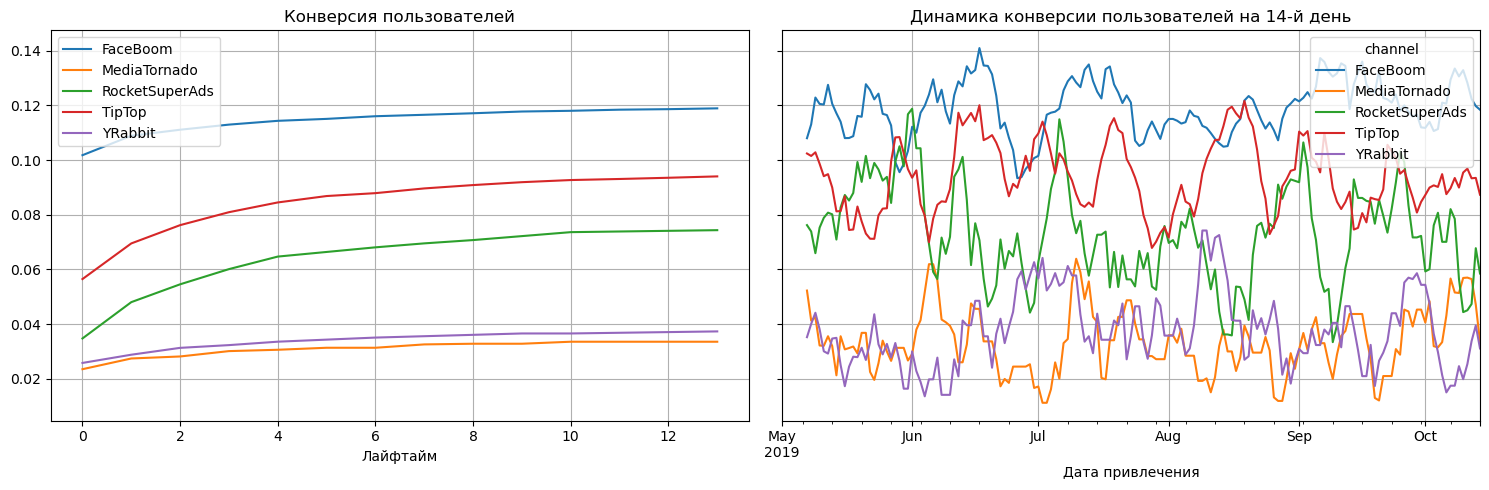

In [85]:
# Графики конверсии по каналам привлечения
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

In [86]:
# Расчет удержания по каналам
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles_ads_usa, visits, observation_date, analysis_horizon, dimensions = ['channel'])
retention_in_time.tail(5)

cohort_size    0    1    2    3    4    5    6    7  \
payer channel dt                                                                
True  YRabbit 2019-10-07            1  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0   
              2019-10-09            1  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0   
              2019-10-11            2  1.0  1.0  0.5  0.0  0.5  0.0  1.0  0.5   
              2019-10-12            2  1.0  0.5  0.5  0.5  0.0  0.5  0.0  0.0   
              2019-10-13            1  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0   

                            8    9   10   11   12   13  
payer channel dt                                        
True  YRabbit 2019-10-07  0.0  1.0  1.0  0.0  0.0  0.0  
              2019-10-09  0.0  0.0  0.0  0.0  0.0  0.0  
              2019-10-11  0.0  0.5  0.0  0.5  0.5  0.5  
              2019-10-12  0.0  0.0  0.0  0.0  0.0  0.0  
              2019-10-13  0.0  0.0  0.0  0.0  0.0  0.0

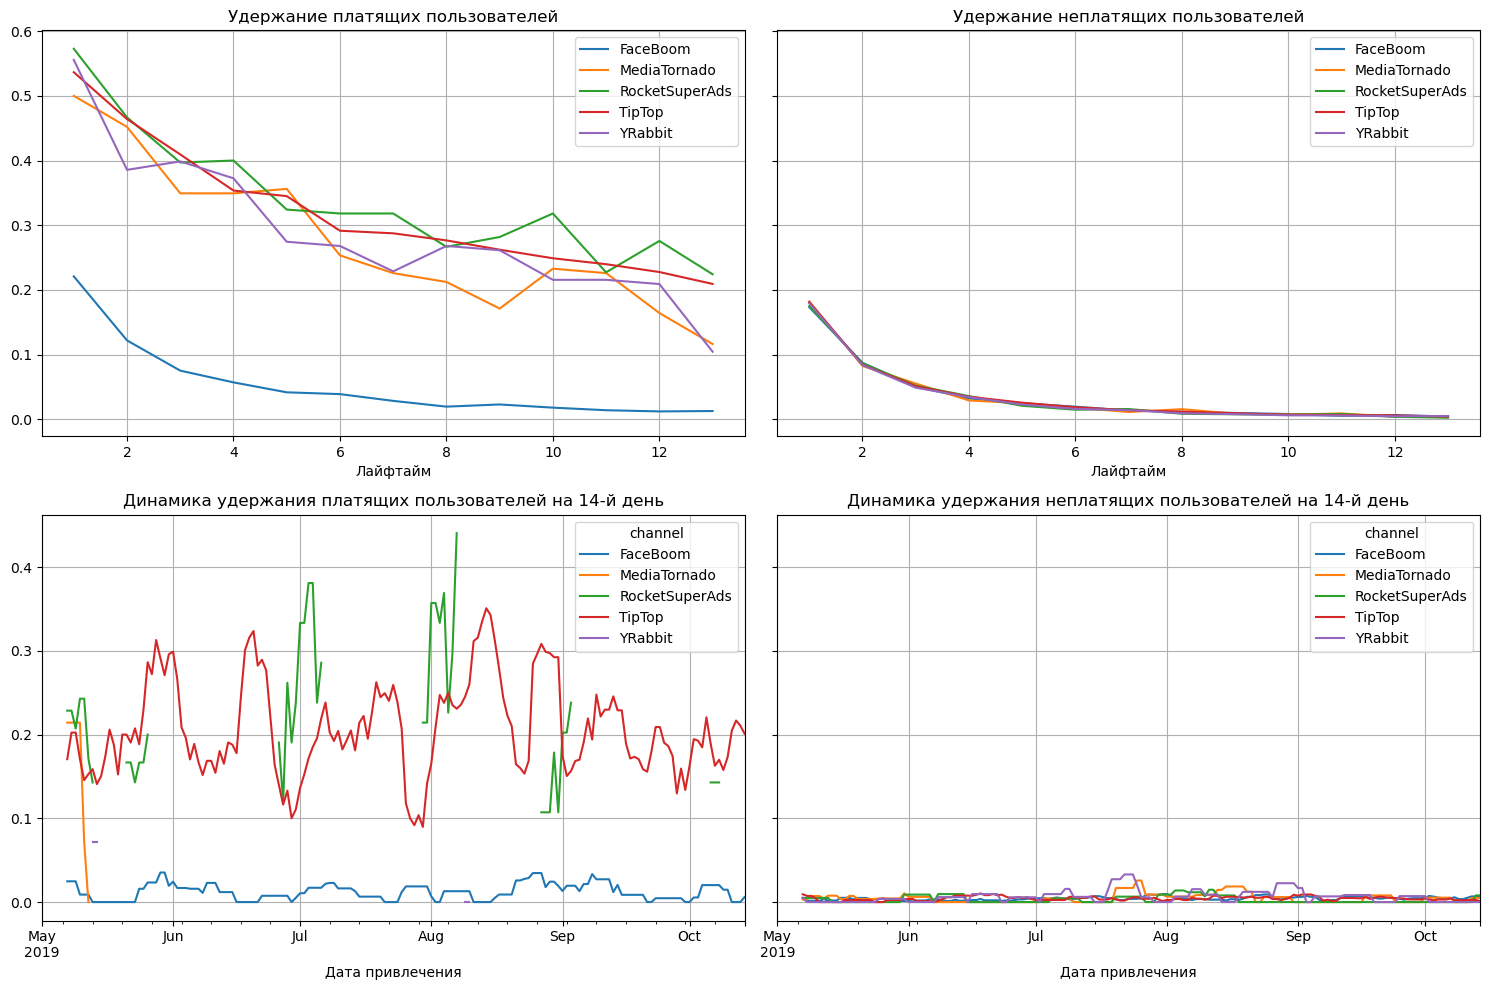

In [87]:
# Графики удержания по каналам в США
plot_retention(retention_grouped, retention_in_time, analysis_horizon)

In [88]:
# Расчет LTV, CAC и ROI в США с разбивкой по рекламным каналам.
ltv, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = \
get_ltv(profiles_ads_usa, orders, observation_date, analysis_horizon, dimensions = ['channel']) 
roi_in_time.tail(5)

cohort_size       cac       0.0       1.0       2.0  \
channel dt                                                                
YRabbit 2019-10-10           26  0.203077  0.000000  0.000000  0.000000   
        2019-10-11           29  0.232759  0.739259  0.739259  0.739259   
        2019-10-12           34  0.246176  0.596177  0.596177  1.788530   
        2019-10-13           25  0.226800  0.880071  0.880071  1.760141   
        2019-10-14           22  0.233182  0.000000  0.000000  0.000000   

                         3.0       4.0       5.0       6.0       7.0  \
channel dt                                                             
YRabbit 2019-10-10  0.000000  0.000000  0.000000  0.000000  0.000000   
        2019-10-11  0.739259  0.739259  0.739259  2.217778  2.957037   
        2019-10-12  1.788530  1.788530  2.384707  2.384707  2.384707   
        2019-10-13  2.640212  2.640212  2.640212  3.520282  3.520282   
        2019-10-14  0.000000  0.000000  0.000000  0.000000  0.000000   

                         8.0       9.0      10.0      11.0      12.0      13.0  
channel dt                                                                      
YRabbit 2019-10-10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
        2019-10-11  2.957037  2.957037  2.957037  3.696296  3.696296  4.435556  
        2019-10-12  2.384707  2.384707  2.384707  2.384707  2.384707  2.384707  
        2019-10-13  3.520282  3.520282  3.520282  3.520282  3.520282  3.520282  
        2019-10-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

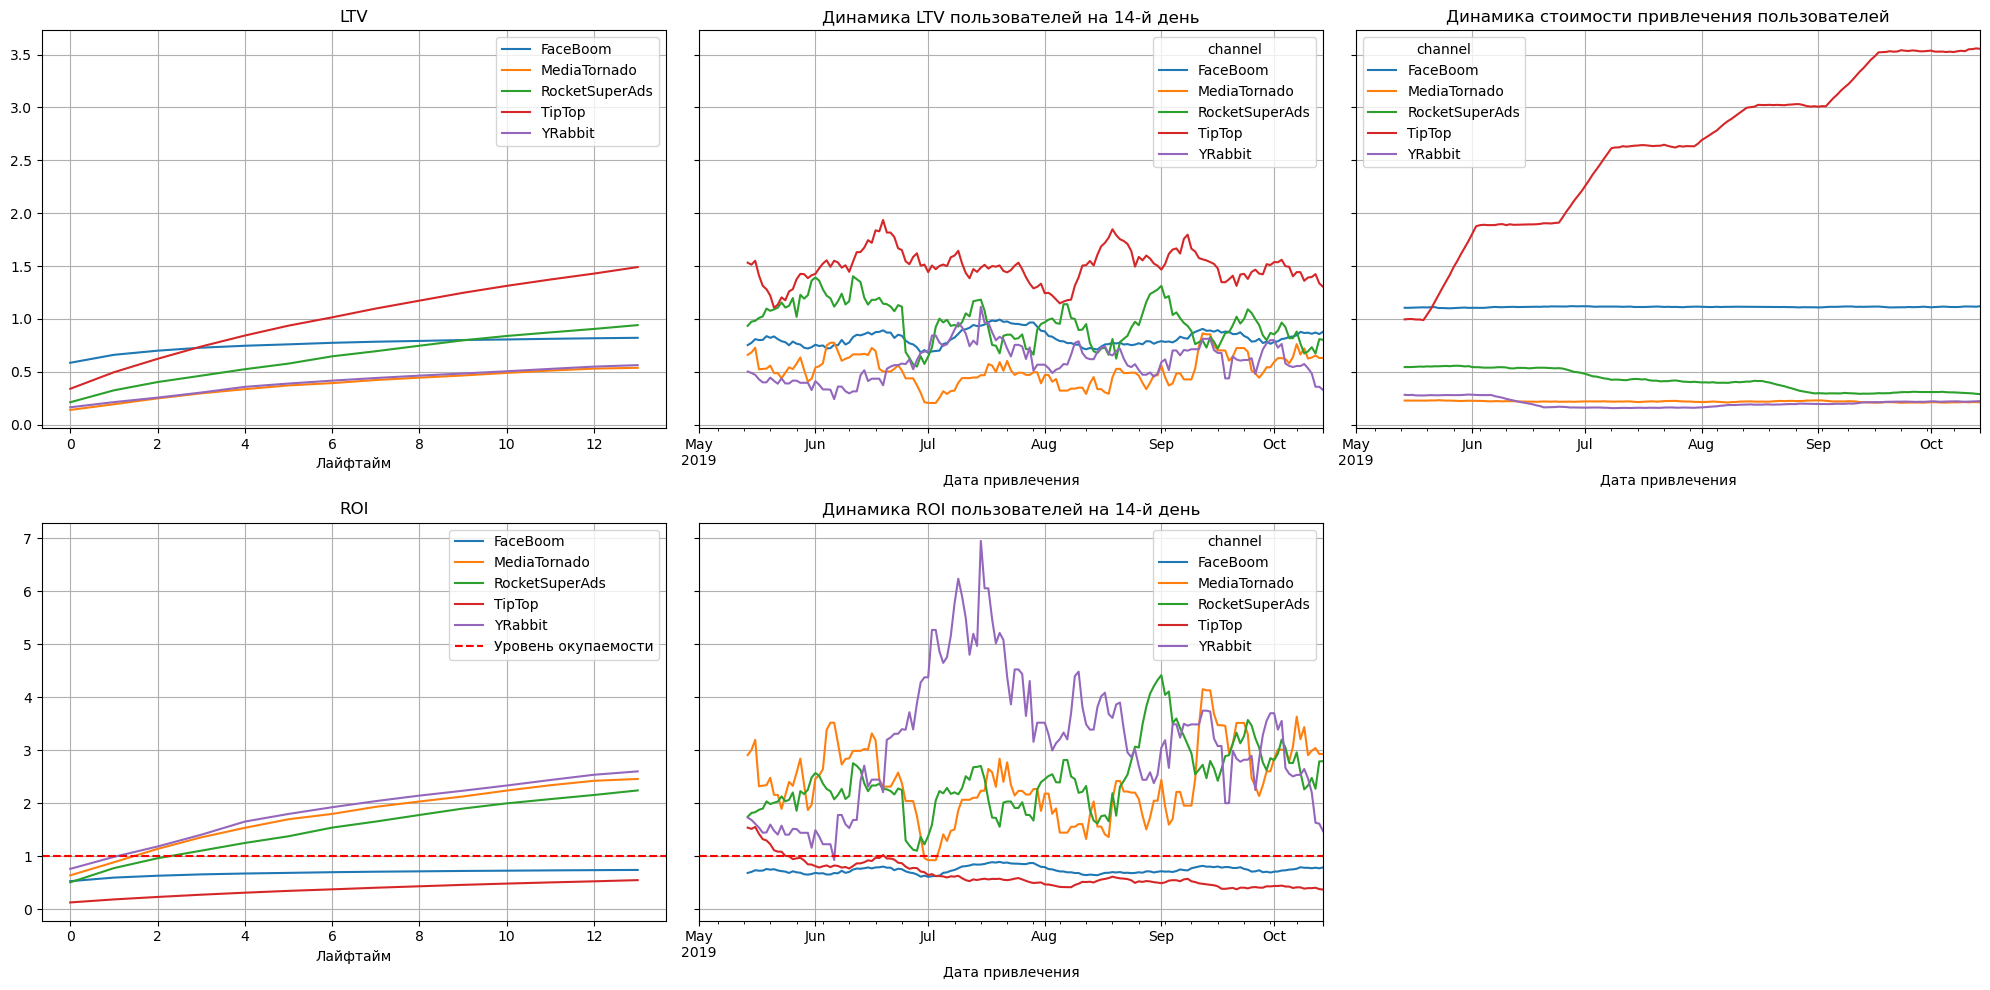

In [89]:
# графики LTV и ROI, а также графики динамики LTV, CAC и ROI в США с разивкой по рекламным каналам.
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, analysis_horizon, window=14)

Для рынка США нужно отказаться от рекламы на канале FaceBoom т.к. он не окупается из-за низкой конверсии. Канал TipTop не окупается из-за высокой стоимости рекламы, если не удастся договориться о снижении стоимости, от него тоже лучше отказаться. Перспективны каналы: MediaTomado, RocketSuperAds, YRabbit.

Пользователи, привлекаемые через каналы `TipTop`, `FaceBoom`, `AdNonSense` не окупаются за лайфтайм. По каналу `TipTop` наблюдается стабильный рост затрат на привлечение клиентов. Через каналы `LambdaMediaAds` и `TipTop` привлекаются клиенты с наибольшим LTV.  
В целом, на сегодняшний день реклама, направленная на привлечение пользователей не окупается.
Негативное влияние на окупаемость все платформы, кроме PC, страна США и рекламные каналы `TipTop`, `FaceBoom`, `AdNonSense`. 
Основная проблема - в повышении стоимости рекламы от канала `TipTop`, из-за чего пользователи, привлеченные через него не окупаются. По каналам `FaceBoom` и `AdNonSense` привлекаются пользователи с самым низким удержанием. При этом сами пользователи из США и пользующиеся устройствами Apple перспективные, обеспечивающие высокий показатель LTV. Нужно снизить стоимость их привлечения.  
Предложения рекламному отделу:
- проведение переговоров с каналом `TipTop` о снижении стоимости рекламы
- в случае невозможности снижения затрат на рекламу рассмотреть возможность отказа от каналов `TipTop`, а также от каналов `FaceBoom`, `AdNonSense` так как у пользователей из этих каналов низок коэффициент удержания.
- перспективны по окупаемости клиентов каналы: `YRabbit`, `Media Tomado`, `RocketSuperAds`. Они обеспечивают высокий показатель удержания при сходных конверсии и общей стоимости клииента.

**Общий вывод**  
Пользователи приходят в приложение из следующих стран: Франция, Германия, Великобритания, США. На США приходится наибольшее количество платящих пользователей, 6 902. Доля остальных стран примерно одинаковая.  
Клиенты пользуются следующими устройствами: iPhone, Android, Mac, PC. Платящие пользователи предпочитают пользоватся iPhone.  
Общая сума расходов на маркетинг: 105 497.30
Распределение трат по рекламным источникам: лидеры - TipTop (52%) и FaceBoom (31%), остальные каналы привленчения менее 5% каждый.
В среднем привлечение одного пользователя (CAC) из каждого источника стоило от 2,73 для TipTop до 0,22 для YRabbit.
Стоимость привленчения пользователя остается примерно постоянной во времени для всех каналов за исключением канала TipTop, который за исследуемый период продемонстрировал рост стоимости с 1 до 3,5.  
Пользоватили с Mac и iPhone имеют несколько больший LTV, но и более высокую стоимость привлечения. В целом пользователи PC окупаются за лайфтайм (14 дней) за счет меньшей стоимости привлечения, а пользователи iPhone, Android и Mac - нет. По динамике ROI заметно, что в начальный период май-июнь пользователи Apple окупались.  
Европейские пользователи имеют сходные показатели LTV, ROI, CAC и их динамики. Окупаются за лайфтайм. У пользователей из США выше LTV, но таже значительно выше и стоимость привлечения, поэтому они не окупаются за лайфтайм. Их окупаемость была лучше в начальный период май-июнь. Динамика стоимости привлечения пользователей из США похожа на рост затрат по каналу TipTop.  
В целом, реклама, направленная на привлечение пользователей не окупается.
Основная причина - 82 % рекламного бюджета тратится на каналы TipTop и FaceBoom, через которые привлекаются пользователи, не окупающиеся за установленный в бизнес-плане срок в 2 недели. TipTop не окупается из-за высокой стоимости рекламы, FaceBoom - из-за низкого удержания клиентов, как и канал AdNonSense. 
Предложения по исправлению ситуации:
- проведение переговоров с каналом TipTop о снижении стоимости рекламы
- отказаться от рекламы по каналам FaceBoom, AdNonSense из-за низкого коэффициента удержания клиентов.
- при наличии технической возможности, привлекать пользователей через каналы YRabbit, Media Tomado, LambdaMediaAds, RocketSuperAds, обеспечивающие более высокую стоимость клиентов за счет высокого коэффициента удержания и сходных с другими каналами конверсии и общей стоимости. При этом важно не потерять клиентов из США и пользователей Apple, поскольку среди них высока доля платящих и они обеспечивают больший объем покупок за лайфтайм.